In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels
from statsmodels.tsa.seasonal import STL

In [2]:
df = pd.read_csv('./ts_kwh_dataframe.csv')
df = df.drop('Unnamed: 0', axis = 1)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
df['Year'] = df.index.year
df['Month'] = df.index.month

In [3]:
list(df)

['kW/h price mean',
 'kW/h price std',
 'Disponibilidad_HIDRAULICA',
 'Disponibilidad_TERMICA',
 'Disponibilidad_SOLAR',
 'Aportes Caudal m3/s',
 'Aportes Energía gWh',
 'Volumen Útil Diario Mm3',
 'Volumen Mm3',
 'Volumen Útil Diario Energía gWh',
 'Volumen Energía gWh',
 'Vertimientos Volumen miles m3',
 'Vertimiento Energía gWh',
 'Year',
 'Month']

In [4]:
df.head()

kW/h price mean  kW/h price std  Disponibilidad_HIDRAULICA  \
Fecha                                                                    
2000-01-01        32.868121        2.857738                  172.68105   
2000-01-02        33.034788        3.674235                  172.50399   
2000-01-03        37.272288        7.710767                  172.38623   
2000-01-04        41.688955        8.150672                  171.95367   
2000-01-05        40.893121        7.956234                  172.34434   

            Disponibilidad_TERMICA  Disponibilidad_SOLAR  Aportes Caudal m3/s  \
Fecha                                                                           
2000-01-01                81.60618                   NaN               719.10   
2000-01-02                79.41920                   NaN               768.34   
2000-01-03                79.41020                   NaN               757.50   
2000-01-04                79.40320                   NaN               739.93   
2000-01-05                79.40320                   NaN               729.85   

            Aportes Energía gWh  Volumen Útil Diario Mm3  Volumen Mm3  \
Fecha                                                                   
2000-01-01              56.6773                5454.0068    6024.5120   
2000-01-02              54.6452                5421.8808    5992.3860   
2000-01-03              57.4883                5390.9129    5961.4181   
2000-01-04              58.4182                5364.3178    5934.8230   
2000-01-05              63.0395                5345.9628    5916.4680   

            Volumen Útil Diario Energía gWh  Volumen Energía gWh  \
Fecha                                                              
2000-01-01                     10732.350532           11548.8853   
2000-01-02                     10712.492849           11529.0276   
2000-01-03                     10677.373760           11493.9081   
2000-01-04                     10643.980148           11460.5150   
2000-01-05                     10614.021370           11430.5566   

            Vertimientos Volumen miles m3  Vertimiento Energía gWh  Year  \
Fecha                                                                      
2000-01-01                     16212.9922                23.887806  2000   
2000-01-02                     14161.0631                20.584258  2000   
2000-01-03                     13370.1628                19.369448  2000   
2000-01-04                     13292.4191                18.710281  2000   
2000-01-05                     16737.6356                21.166744  2000   

            Month  
Fecha              
2000-01-01      1  
2000-01-02      1  
2000-01-03      1  
2000-01-04      1  
2000-01-05      1

In [5]:
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [58]:
df.reset_index()

Fecha  kW/h price mean  kW/h price std  Disponibilidad_HIDRAULICA  \
0    2000-01-01        32.868121        2.857738                 172.681050   
1    2000-01-02        33.034788        3.674235                 172.503990   
2    2000-01-03        37.272288        7.710767                 172.386230   
3    2000-01-04        41.688955        8.150672                 171.953670   
4    2000-01-05        40.893121        7.956234                 172.344340   
...         ...              ...             ...                        ...   
7861 2021-07-10        85.156250        3.785181                 225.102748   
7862 2021-07-11        83.352917        0.373462                 233.070749   
7863 2021-07-12        84.980000        0.418642                 233.112748   
7864 2021-07-13        83.689167        0.140555                 235.541246   
7865 2021-07-14        83.287083        0.072381                 230.996932   

      Disponibilidad_TERMICA  Disponibilidad_SOLAR  Aportes Caudal m3/s  \
0                  81.606180                   NaN              719.100   
1                  79.419200                   NaN              768.340   
2                  79.410200                   NaN              757.500   
3                  79.403200                   NaN              739.930   
4                  79.403200                   NaN              729.850   
...                      ...                   ...                  ...   
7861              106.347899                   NaN             2758.637   
7862              106.324499                   NaN             3598.633   
7863              106.382000                   NaN             2912.525   
7864              106.282799                   NaN             3296.708   
7865              105.868266                   NaN             2825.656   

      Aportes Energía gWh  Volumen Útil Diario Mm3  Volumen Mm3  \
0                 56.6773                5454.0068    6024.5120   
1                 54.6452                5421.8808    5992.3860   
2                 57.4883                5390.9129    5961.4181   
3                 58.4182                5364.3178    5934.8230   
4                 63.0395                5345.9628    5916.4680   
...                   ...                      ...          ...   
7861             249.8449               11739.2200   14470.6500   
7862             333.1600               11824.9198   14556.3498   
7863             224.1366               11839.7830   14571.2130   
7864             237.2587               11873.2230   14604.6530   
7865             220.9748               11896.1410   14627.5710   

      Volumen Útil Diario Energía gWh  Volumen Energía gWh  \
0                        10732.350532           11548.8853   
1                        10712.492849           11529.0276   
2                        10677.373760           11493.9081   
3                        10643.980148           11460.5150   
4                        10614.021370           11430.5566   
...                               ...                  ...   
7861                     14126.520300           15678.8082   
7862                     14211.383800           15763.6715   
7863                     14213.381700           15765.6696   
7864                     14223.834000           15776.1216   
7865                     14221.719200           15774.0072   

      Vertimientos Volumen miles m3  Vertimiento Energía gWh  Year  Month  \
0                        16212.9922                23.887806  2000      1   
1                        14161.0631                20.584258  2000      1   
2                        13370.1628                19.369448  2000      1   
3                        13292.4191                18.710281  2000      1   
4                        16737.6356                21.166744  2000      1   
...                             ...                      ...   ...    ...   
7861                     29622.3370                60.724948  2021     

In [6]:
df["Month2"] = df["Month"].replace({1:"January", 2:"February", 3:"March", 4:"April",
                                    5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 
                                    10:"October", 11:"November", 12:"December"})

In [7]:
df.head()

kW/h price mean  kW/h price std  Disponibilidad_HIDRAULICA  \
Fecha                                                                    
2000-01-01        32.868121        2.857738                  172.68105   
2000-01-02        33.034788        3.674235                  172.50399   
2000-01-03        37.272288        7.710767                  172.38623   
2000-01-04        41.688955        8.150672                  171.95367   
2000-01-05        40.893121        7.956234                  172.34434   

            Disponibilidad_TERMICA  Disponibilidad_SOLAR  Aportes Caudal m3/s  \
Fecha                                                                           
2000-01-01                81.60618                   NaN               719.10   
2000-01-02                79.41920                   NaN               768.34   
2000-01-03                79.41020                   NaN               757.50   
2000-01-04                79.40320                   NaN               739.93   
2000-01-05                79.40320                   NaN               729.85   

            Aportes Energía gWh  Volumen Útil Diario Mm3  Volumen Mm3  \
Fecha                                                                   
2000-01-01              56.6773                5454.0068    6024.5120   
2000-01-02              54.6452                5421.8808    5992.3860   
2000-01-03              57.4883                5390.9129    5961.4181   
2000-01-04              58.4182                5364.3178    5934.8230   
2000-01-05              63.0395                5345.9628    5916.4680   

            Volumen Útil Diario Energía gWh  Volumen Energía gWh  \
Fecha                                                              
2000-01-01                     10732.350532           11548.8853   
2000-01-02                     10712.492849           11529.0276   
2000-01-03                     10677.373760           11493.9081   
2000-01-04                     10643.980148           11460.5150   
2000-01-05                     10614.021370           11430.5566   

            Vertimientos Volumen miles m3  Vertimiento Energía gWh  Year  \
Fecha                                                                      
2000-01-01                     16212.9922                23.887806  2000   
2000-01-02                     14161.0631                20.584258  2000   
2000-01-03                     13370.1628                19.369448  2000   
2000-01-04                     13292.4191                18.710281  2000   
2000-01-05                     16737.6356                21.166744  2000   

            Month   Month2  
Fecha                       
2000-01-01      1  January  
2000-01-02      1  January  
2000-01-03      1  January  
2000-01-04      1  January  
2000-01-05      1  January

In [8]:
months = list(df.Month2.unique())
months.insert(0, 'All')
months

['All',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [9]:
variables = ['kW/h price mean', 
       'Disponibilidad_HIDRAULICA', 'Disponibilidad_TERMICA',
       'Disponibilidad_SOLAR', 'Aportes Caudal m3/s', 'Aportes Energía gWh',
       'Volumen Útil Diario Mm3', 'Volumen Mm3',
       'Volumen Útil Diario Energía gWh', 'Volumen Energía gWh',
       'Vertimientos Volumen miles m3', 'Vertimiento Energía gWh']

### Página 1 - gráfica 1
### Pendiente - barchart

### Página 1 - gráfica 2
### Pendiente - barchart

<AxesSubplot:xlabel='Disponibilidad_HIDRAULICA', ylabel='kW/h price mean'>

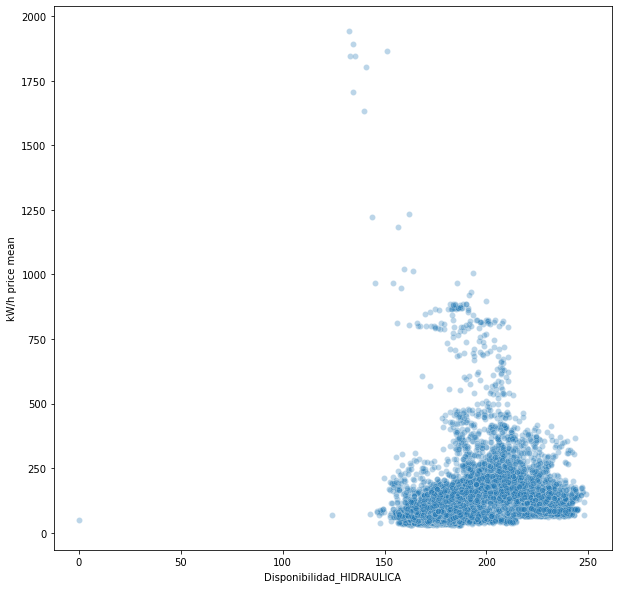

In [10]:
# Página 1 - gráfica 3a

# Scatterplots:
# Precio vs Disponibilidad_HIDRAULICA:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_HIDRAULICA', alpha=0.3)

<AxesSubplot:xlabel='Disponibilidad_TERMICA', ylabel='kW/h price mean'>

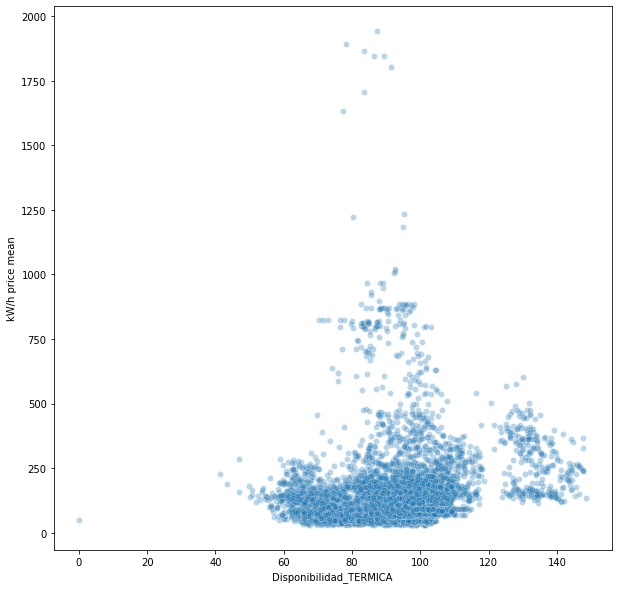

In [11]:
# Página 1 - gráfica 3b

# Scatterplots:
# Precio vs Disponibilidad_TERMICA:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_TERMICA', alpha=0.3)

<AxesSubplot:xlabel='Disponibilidad_SOLAR', ylabel='kW/h price mean'>

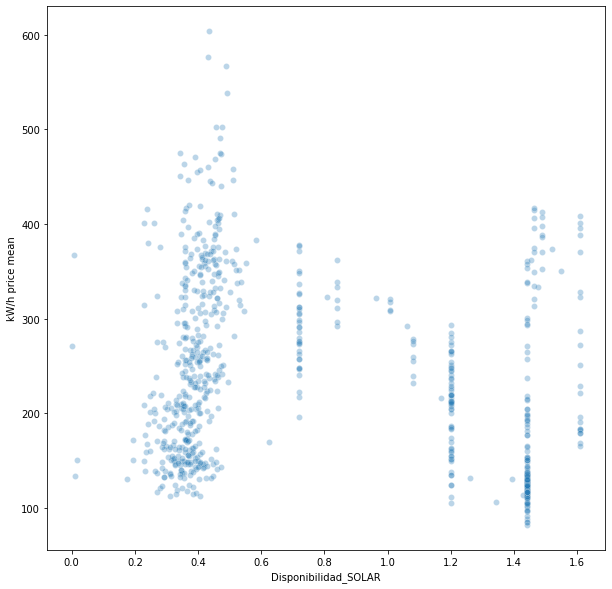

In [12]:
# Página 1 - gráfica 3c

# Scatterplots:
# Precio vs Disponibilidad_SOLAR:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_SOLAR', alpha=0.3)

### Página 1 - gráfica 4
### Pendiente - Tabla

# ::::::::::::::::::::::::

### Página 2 - gráfica 1
### scatter plot 'Aportes Caudal m3/s' vs 'Aportes Energía gWh'

In [30]:
df.head()

kW/h price mean  kW/h price std  Disponibilidad_HIDRAULICA  \
Fecha                                                                    
2000-01-01        32.868121        2.857738                  172.68105   
2000-01-02        33.034788        3.674235                  172.50399   
2000-01-03        37.272288        7.710767                  172.38623   
2000-01-04        41.688955        8.150672                  171.95367   
2000-01-05        40.893121        7.956234                  172.34434   

            Disponibilidad_TERMICA  Disponibilidad_SOLAR  Aportes Caudal m3/s  \
Fecha                                                                           
2000-01-01                81.60618                   NaN               719.10   
2000-01-02                79.41920                   NaN               768.34   
2000-01-03                79.41020                   NaN               757.50   
2000-01-04                79.40320                   NaN               739.93   
2000-01-05                79.40320                   NaN               729.85   

            Aportes Energía gWh  Volumen Útil Diario Mm3  Volumen Mm3  \
Fecha                                                                   
2000-01-01              56.6773                5454.0068    6024.5120   
2000-01-02              54.6452                5421.8808    5992.3860   
2000-01-03              57.4883                5390.9129    5961.4181   
2000-01-04              58.4182                5364.3178    5934.8230   
2000-01-05              63.0395                5345.9628    5916.4680   

            Volumen Útil Diario Energía gWh  Volumen Energía gWh  \
Fecha                                                              
2000-01-01                     10732.350532           11548.8853   
2000-01-02                     10712.492849           11529.0276   
2000-01-03                     10677.373760           11493.9081   
2000-01-04                     10643.980148           11460.5150   
2000-01-05                     10614.021370           11430.5566   

            Vertimientos Volumen miles m3  Vertimiento Energía gWh  Year  \
Fecha                                                                      
2000-01-01                     16212.9922                23.887806  2000   
2000-01-02                     14161.0631                20.584258  2000   
2000-01-03                     13370.1628                19.369448  2000   
2000-01-04                     13292.4191                18.710281  2000   
2000-01-05                     16737.6356                21.166744  2000   

            Month   Month2  
Fecha                       
2000-01-01      1  January  
2000-01-02      1  January  
2000-01-03      1  January  
2000-01-04      1  January  
2000-01-05      1  January

In [28]:
list(df)

['kW/h price mean',
 'kW/h price std',
 'Disponibilidad_HIDRAULICA',
 'Disponibilidad_TERMICA',
 'Disponibilidad_SOLAR',
 'Aportes Caudal m3/s',
 'Aportes Energía gWh',
 'Volumen Útil Diario Mm3',
 'Volumen Mm3',
 'Volumen Útil Diario Energía gWh',
 'Volumen Energía gWh',
 'Vertimientos Volumen miles m3',
 'Vertimiento Energía gWh',
 'Year',
 'Month',
 'Month2']

In [48]:
import plotly.express as px
fig2 = px.scatter(    
    df, x='Aportes Caudal m3/s', y='Aportes Energía gWh', 
    title="Wasa wasa"
)

fig2.update_layout( # customize font and legend orientation & position
    # font_family="Rockwell",
    margin=dict(l=80, r=20, t=75, b=20),
    font_color='#757575'
)

fig2.update_traces(
    marker=dict(size=6, line=dict(width=1, color='#383648')),
    selector=dict(mode='markers')
)

fig2.show()

In [54]:
import plotly.express as px

fig = px.box(
    df, x='Month2', y='Aportes Caudal m3/s', color='Month2',
    title="Wasa wasa")

fig.update_layout( # customize font and legend orientation & position
    # font_family="Rockwell",
    margin=dict(l=80, r=20, t=75, b=20),
    font_color='#757575',
        legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()

<AxesSubplot:xlabel='Month', ylabel='Aportes Caudal m3/s'>

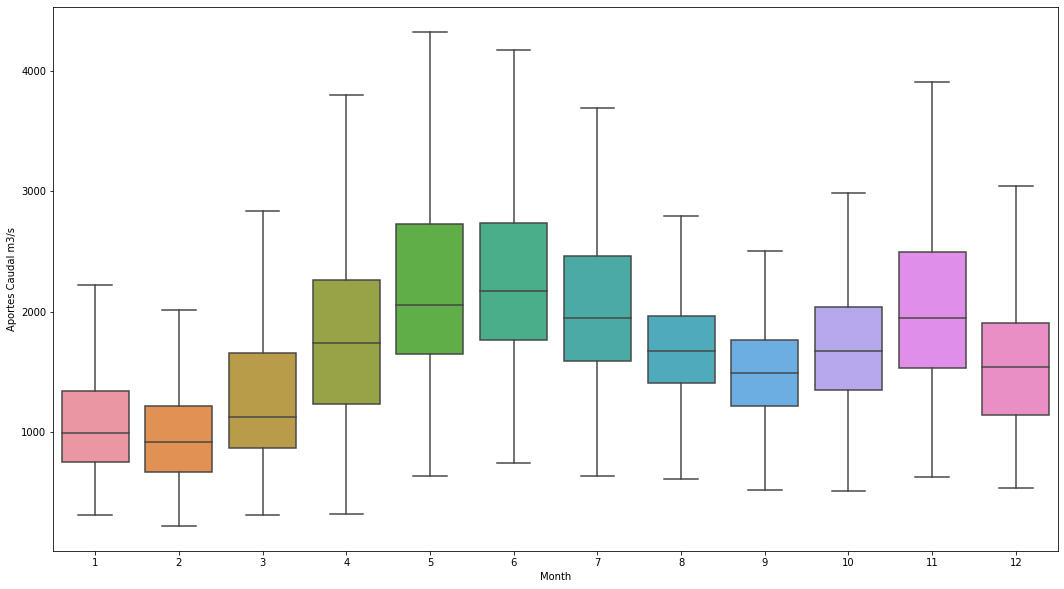

In [13]:
# Página 2 - gráfica 2a

# Boxplots: 
# Aportes m3/s mensual:
plt.subplots(figsize=(18,10))
sns.boxplot(data=df, x='Month', y='Aportes Caudal m3/s', showfliers=False)

<AxesSubplot:xlabel='Month', ylabel='Aportes Energía gWh'>

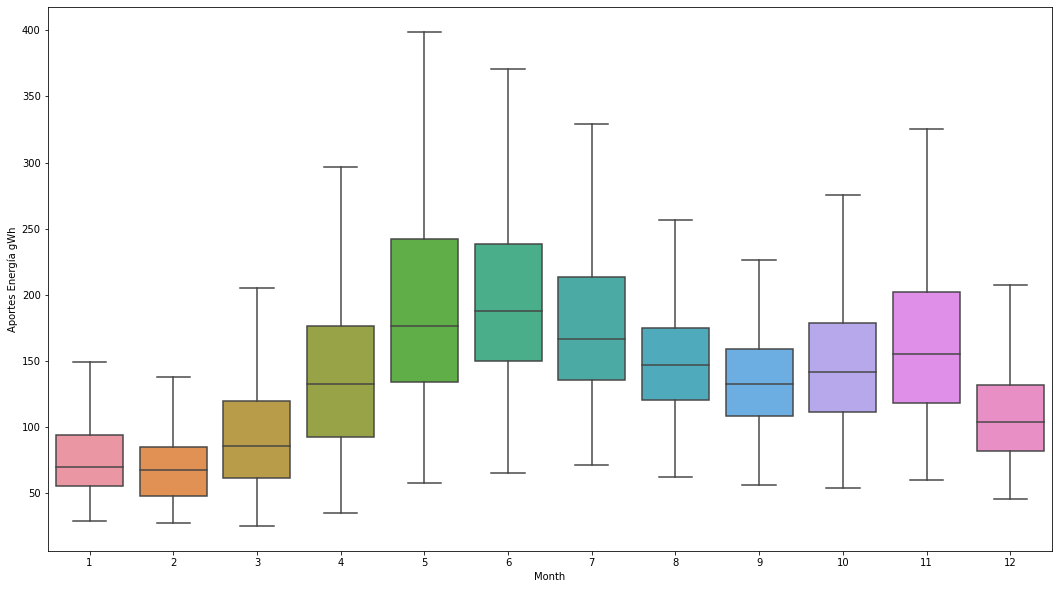

In [14]:
# Página 2 - gráfica 2b

# Boxplots:
# Aportes Energía gWh mensual:
plt.subplots(figsize=(18,10))
sns.boxplot(data=df, x='Month', y='Aportes Energía gWh', showfliers=False)

<AxesSubplot:xlabel='Aportes Caudal m3/s', ylabel='kW/h price mean'>

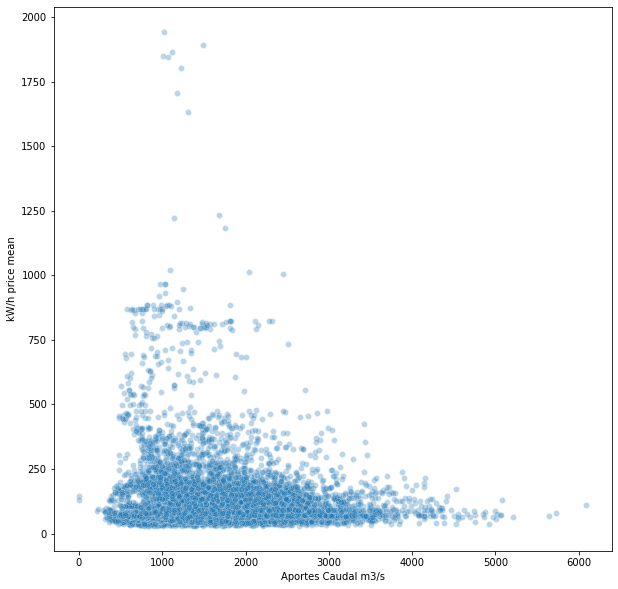

In [15]:
# Página 2 - gráfica 3a

# Scatterplots:
# Precio vs Aportes Caudal:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Aportes Caudal m3/s', alpha=0.3)

<AxesSubplot:xlabel='Aportes Energía gWh', ylabel='kW/h price mean'>

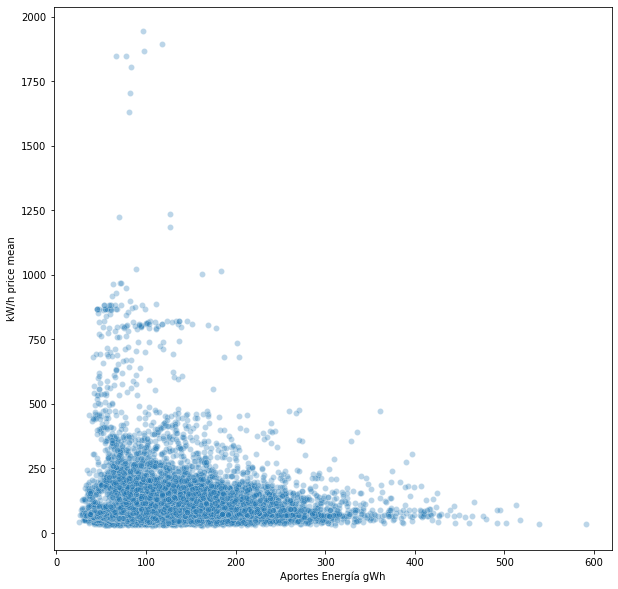

In [16]:
# Página 2 - gráfica 3b

# Scatterplots:
# Precio vs Aportes Energia:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Aportes Energía gWh', alpha=0.3)

In [55]:
list(df)

['kW/h price mean',
 'kW/h price std',
 'Disponibilidad_HIDRAULICA',
 'Disponibilidad_TERMICA',
 'Disponibilidad_SOLAR',
 'Aportes Caudal m3/s',
 'Aportes Energía gWh',
 'Volumen Útil Diario Mm3',
 'Volumen Mm3',
 'Volumen Útil Diario Energía gWh',
 'Volumen Energía gWh',
 'Vertimientos Volumen miles m3',
 'Vertimiento Energía gWh',
 'Year',
 'Month',
 'Month2']

In [60]:
import plotly.express as px
df2 = df.reset_index()

fig = px.line(
    df2, x="Fecha", y='Aportes Caudal m3/s', 
    title='Wasa wasa 4')

fig.update_layout(
    # font_family="Rockwell",
    margin=dict(l=80, r=20, t=75, b=20),
    font_color='#757575'
)

fig.show()

Aportes Caudal m3/s


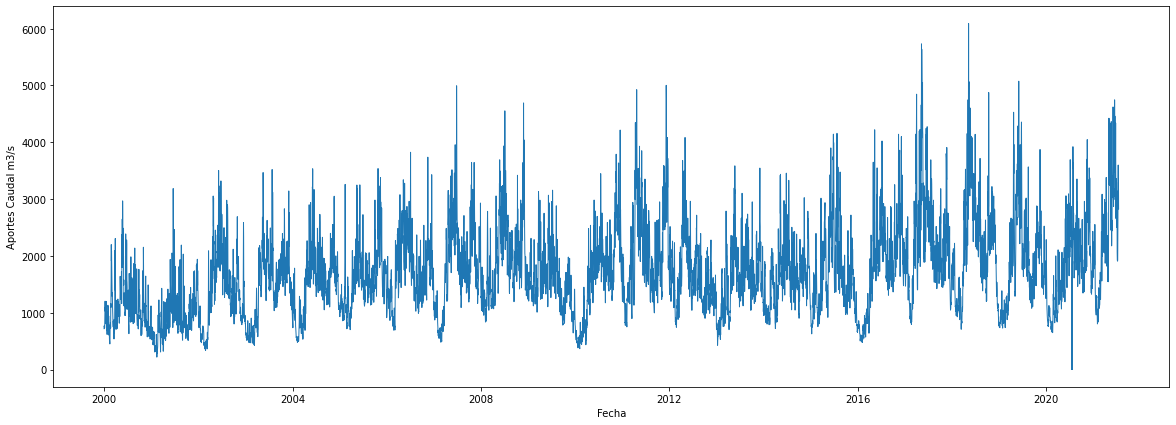

Aportes Energía gWh


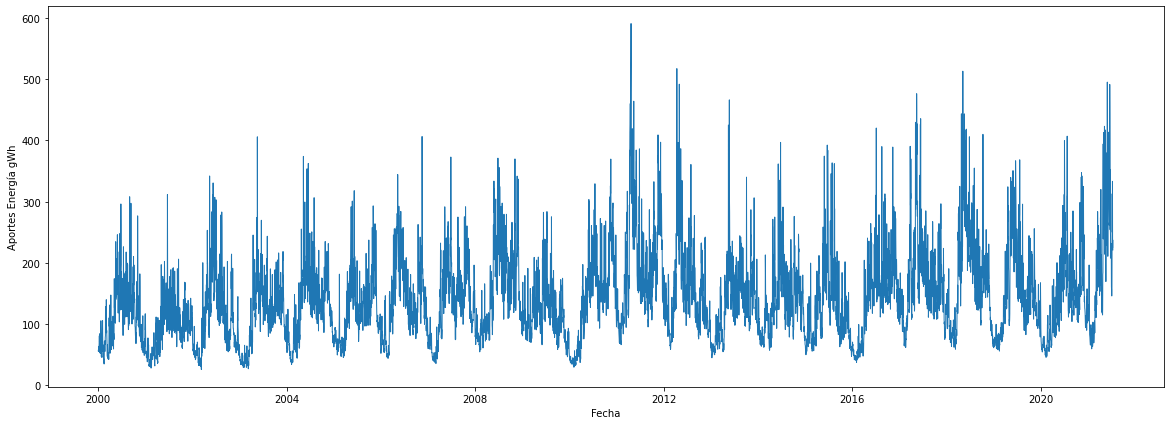

In [57]:
# Página 2 - gráfica 4a, 4b
# Aportes Caudal m3/s, Aportes Energía gWh
variables2 = ['Aportes Caudal m3/s', 'Aportes Energía gWh']
for i in variables2:
    print(i)
    fig, ax = plt.subplots(figsize=(20,7))
    sns.lineplot(data = df, y=i, x = 'Fecha', linewidth=1)
    plt.show()

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

#EDA:

## Correlations:

In [18]:
list(df)

['kW/h price mean',
 'kW/h price std',
 'Disponibilidad_HIDRAULICA',
 'Disponibilidad_TERMICA',
 'Disponibilidad_SOLAR',
 'Aportes Caudal m3/s',
 'Aportes Energía gWh',
 'Volumen Útil Diario Mm3',
 'Volumen Mm3',
 'Volumen Útil Diario Energía gWh',
 'Volumen Energía gWh',
 'Vertimientos Volumen miles m3',
 'Vertimiento Energía gWh',
 'Year',
 'Month',
 'Month2']

<AxesSubplot:>

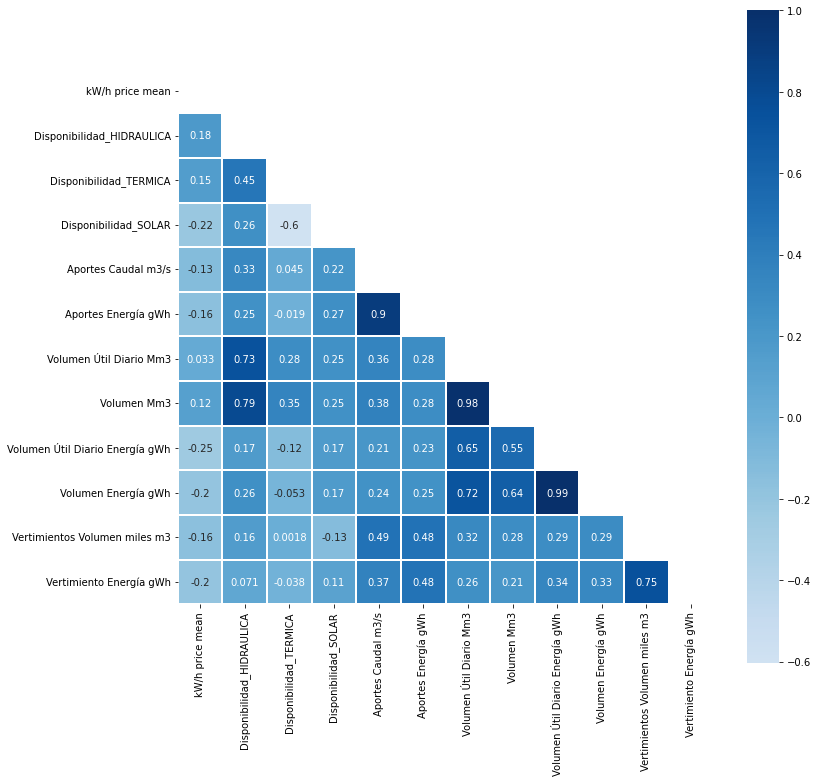

In [19]:
# Página 2 - gráfica 1??
# 'Aportes Caudal m3/s' vs 'Aportes Energía gWh',

corr = df[variables].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot = True)

## Time Series:

### Raw time series:

### Jointplots:

Yearly:

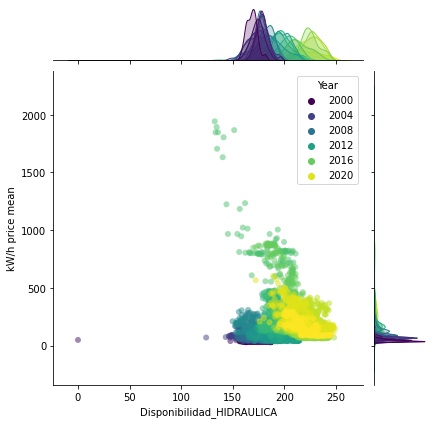

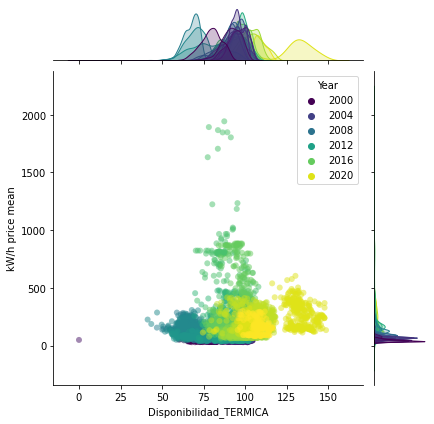

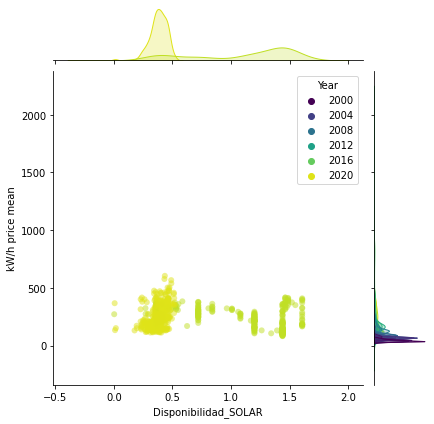

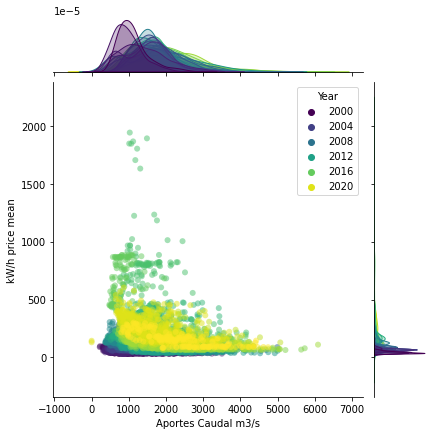

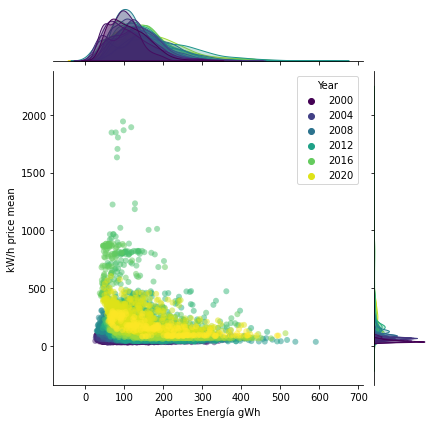

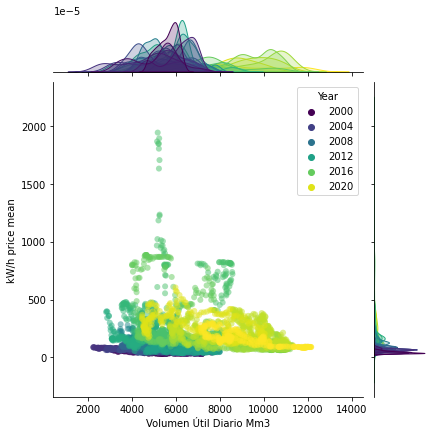

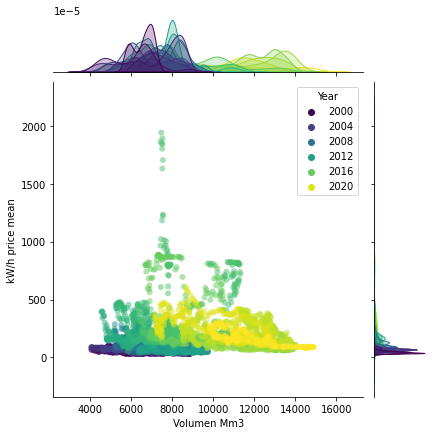

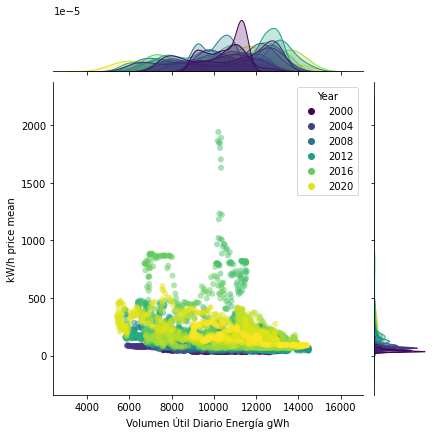

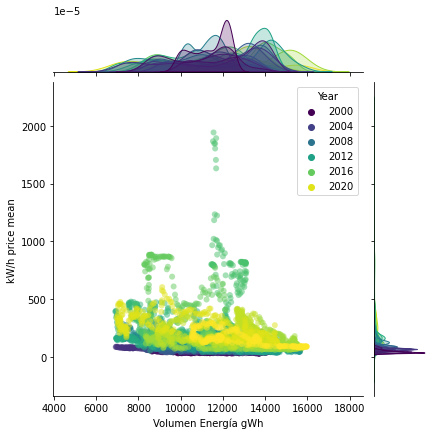

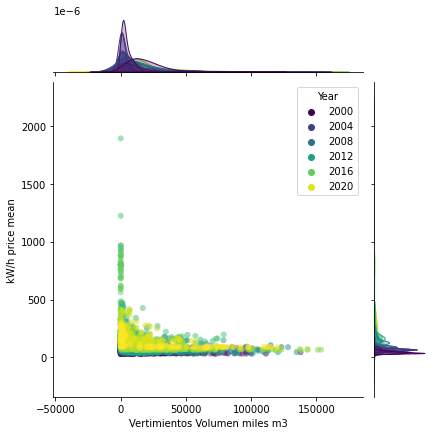

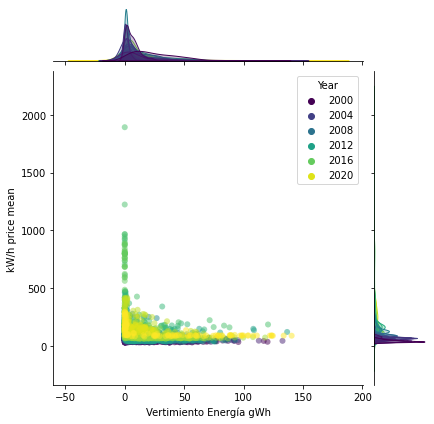

In [20]:
for i in variables[1:]:
  fig = sns.jointplot(data = df, y='kW/h price mean', x = i, hue = 'Year', alpha=.5, linewidth=0, palette = 'viridis')
  plt.show(fig)

Monthly:

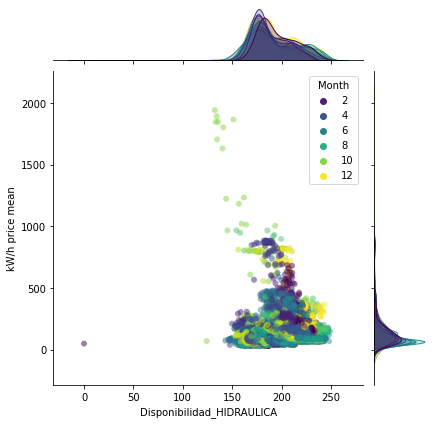

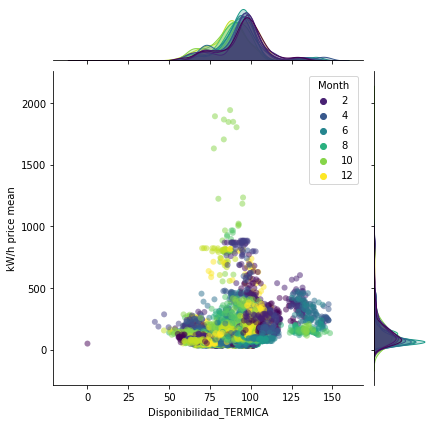

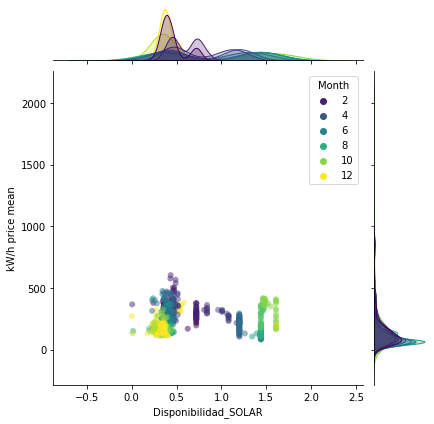

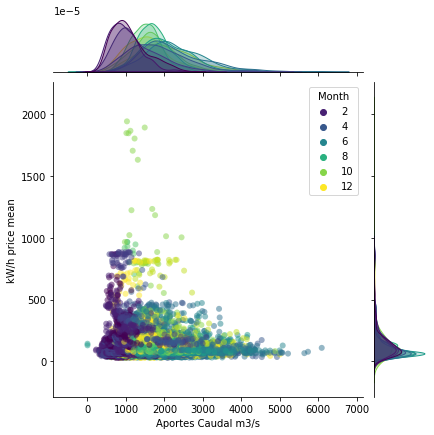

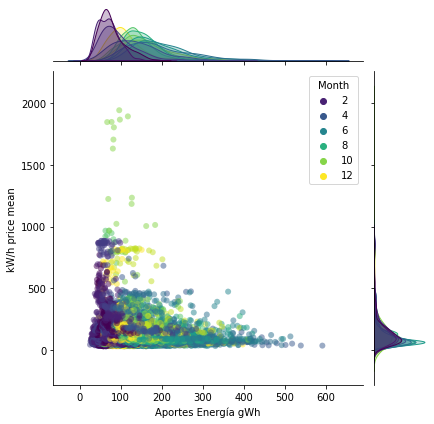

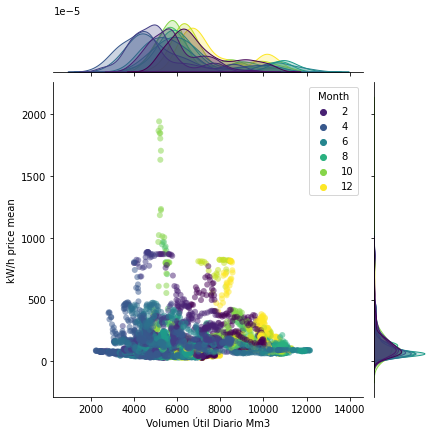

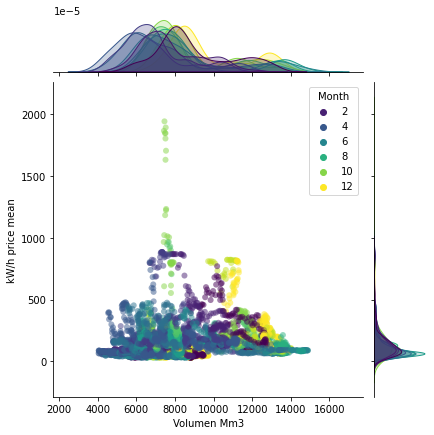

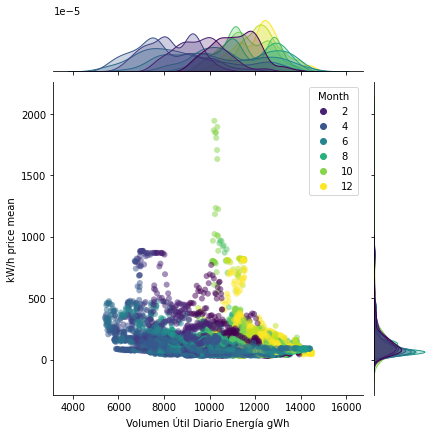

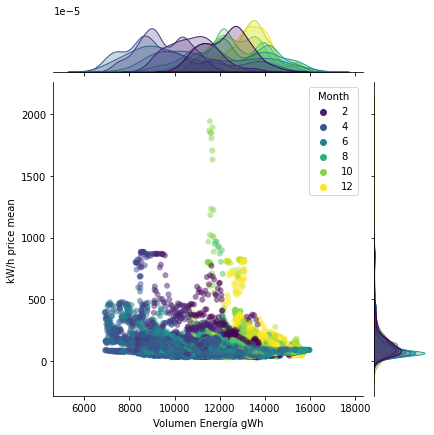

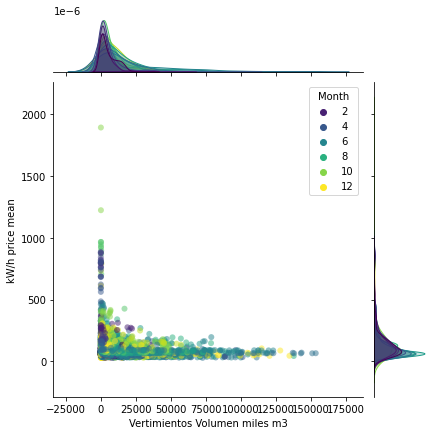

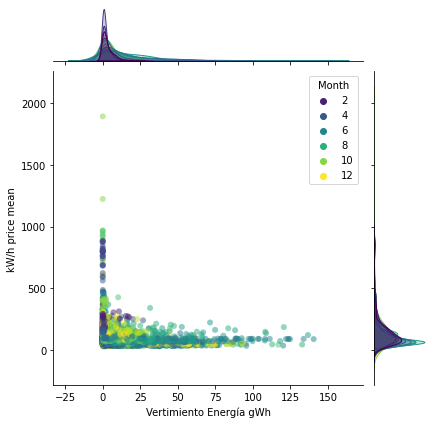

In [21]:
for i in variables[1:]:
  fig = sns.jointplot(data = df, y='kW/h price mean', x = i, hue = 'Month', alpha=.5, linewidth=0, palette = 'viridis')
  plt.show(fig)

### Stationarity:

Yearly:

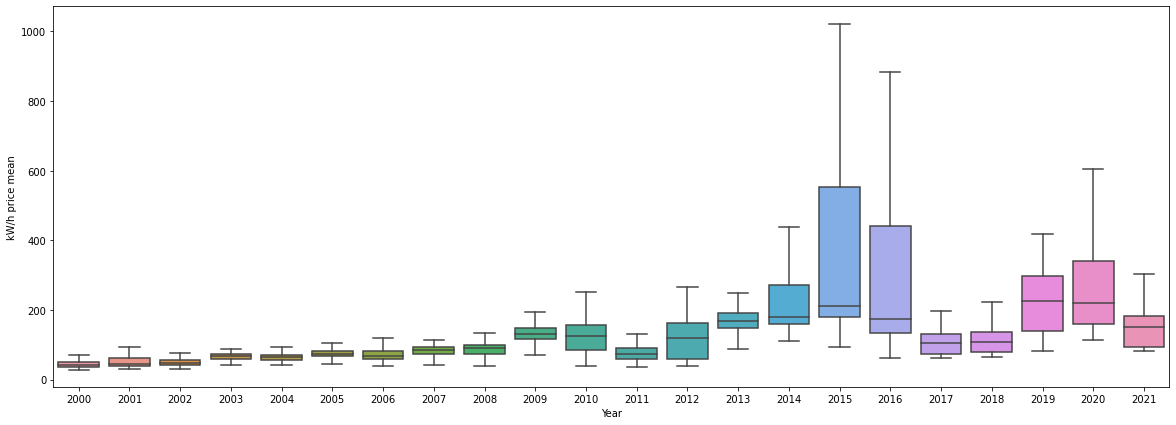

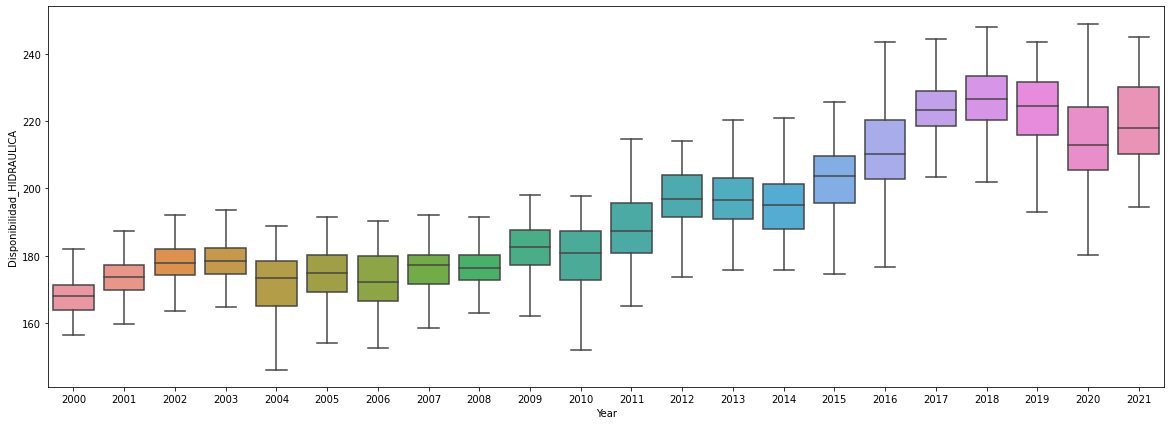

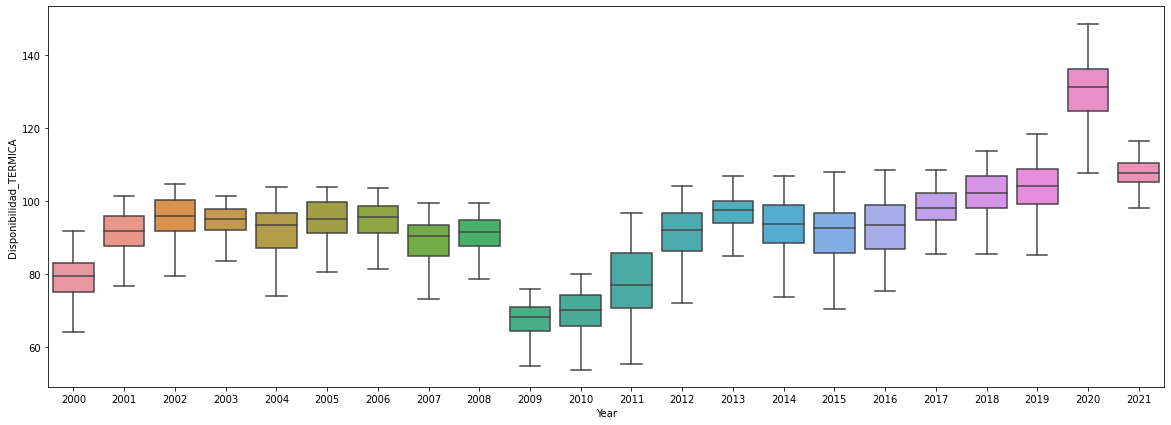

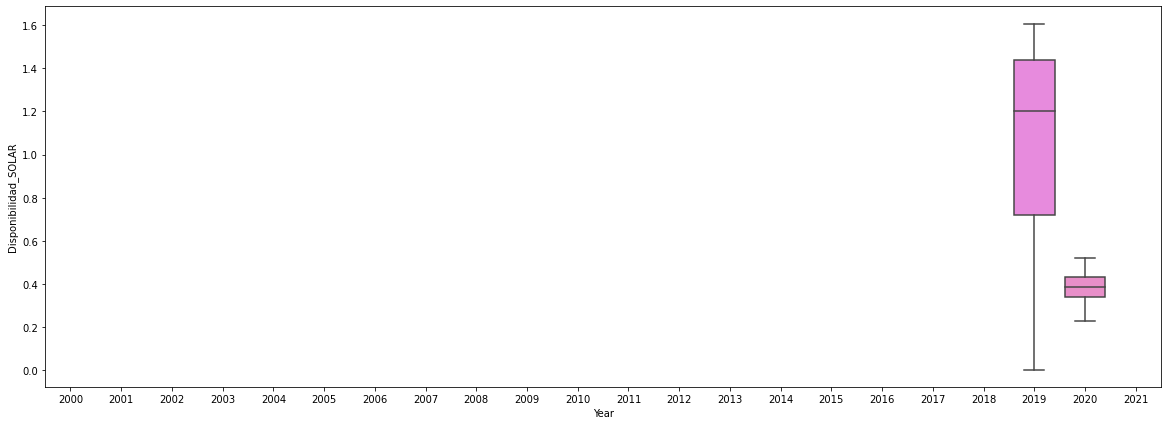

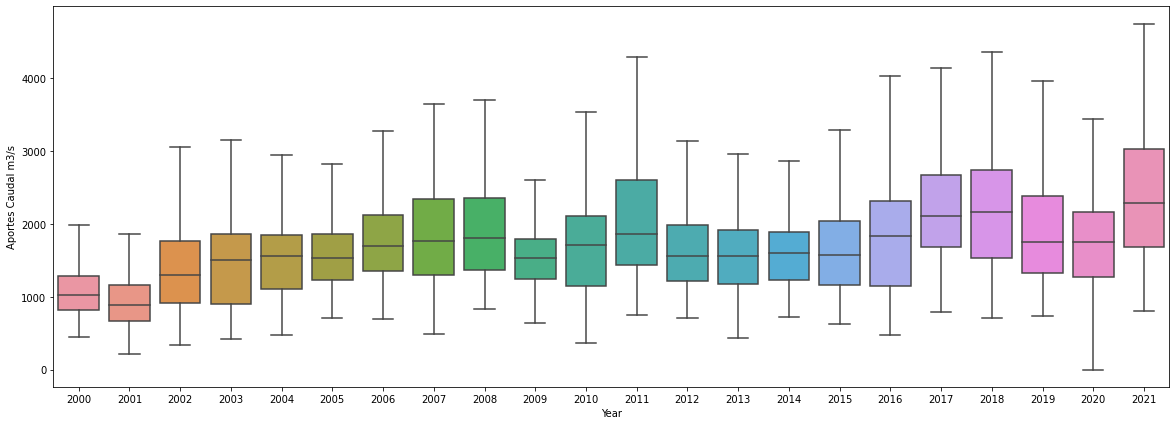

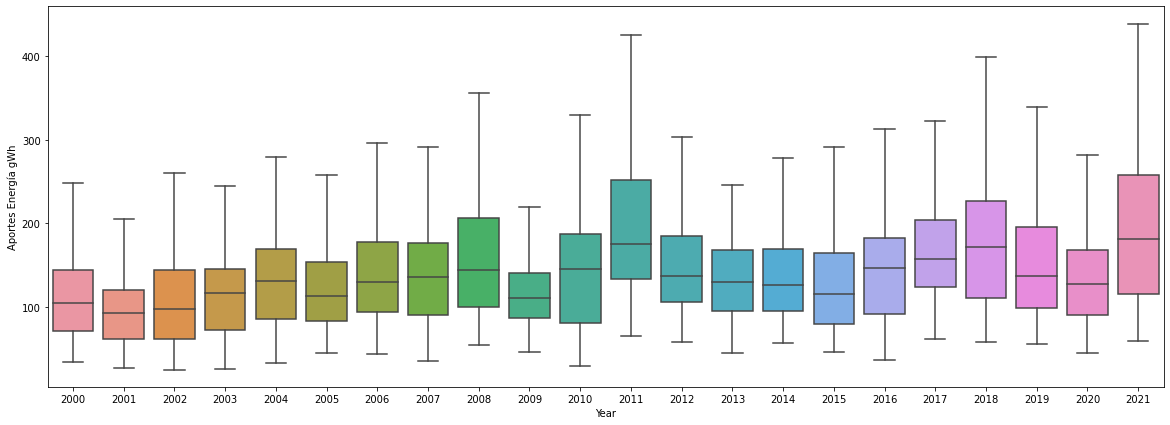

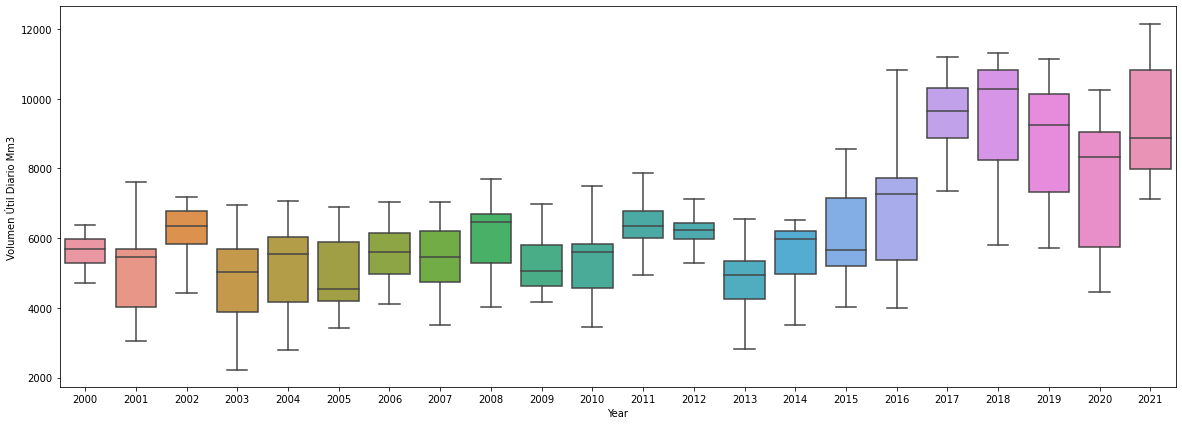

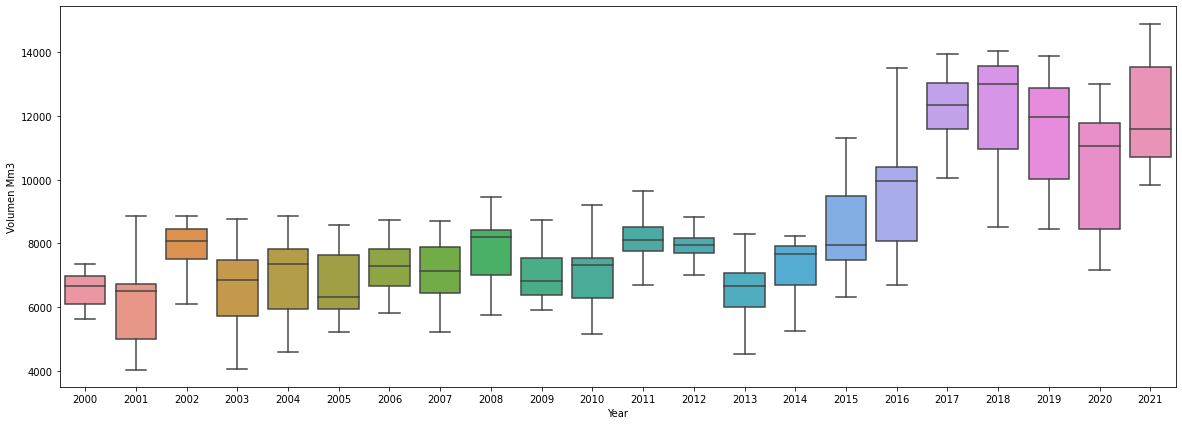

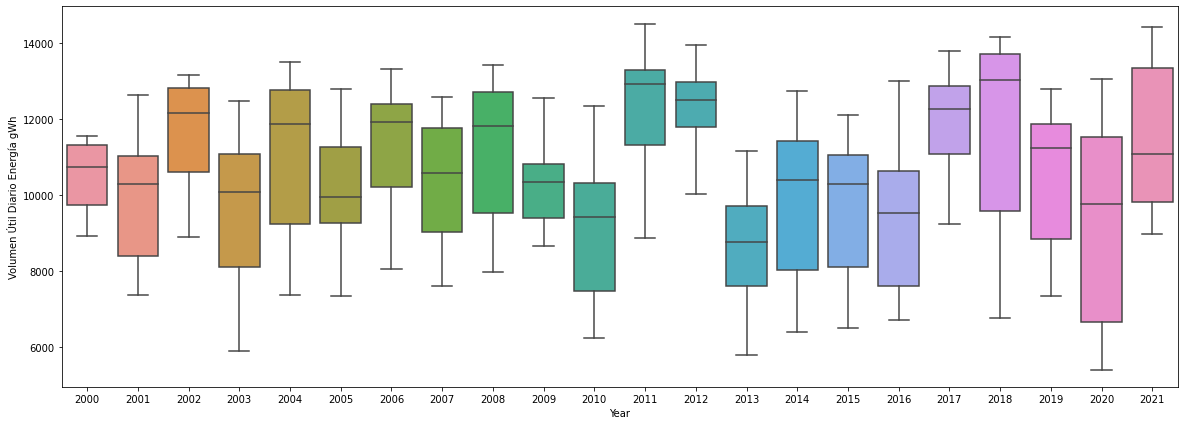

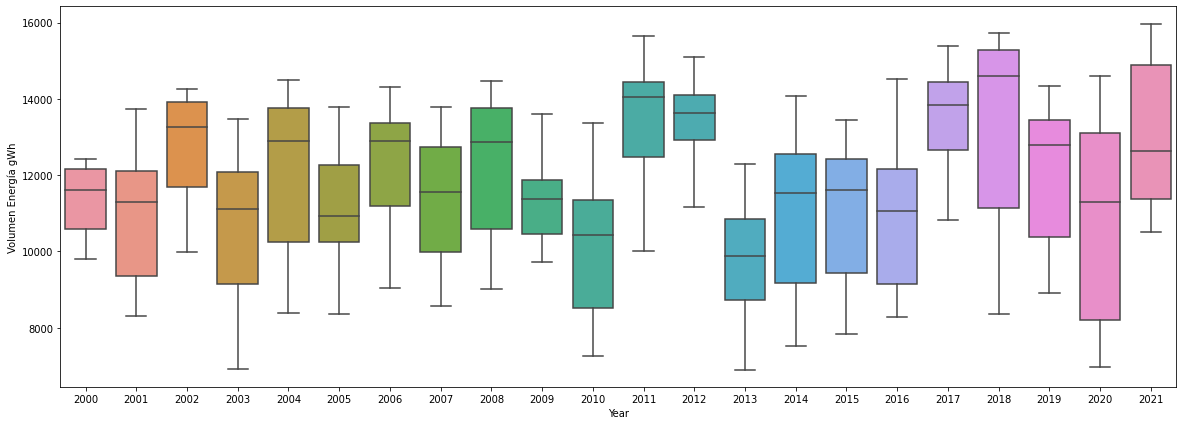

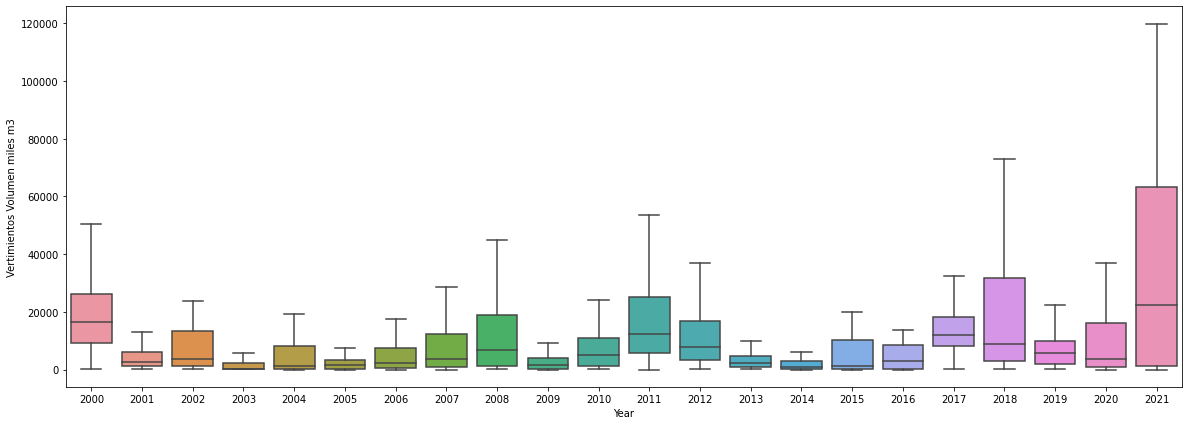

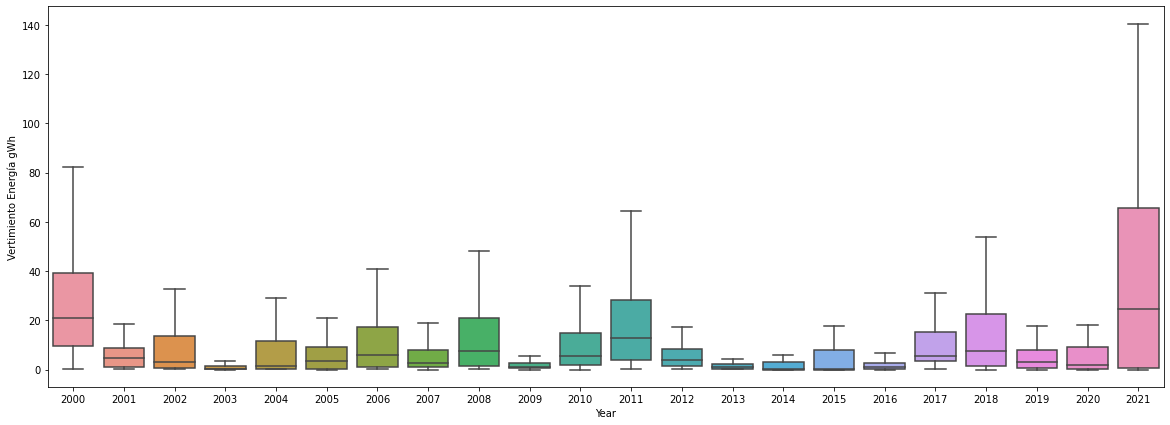

In [22]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.boxplot(data=df, x='Year', y=i, showfliers=False)
  plt.show()

Monthly:

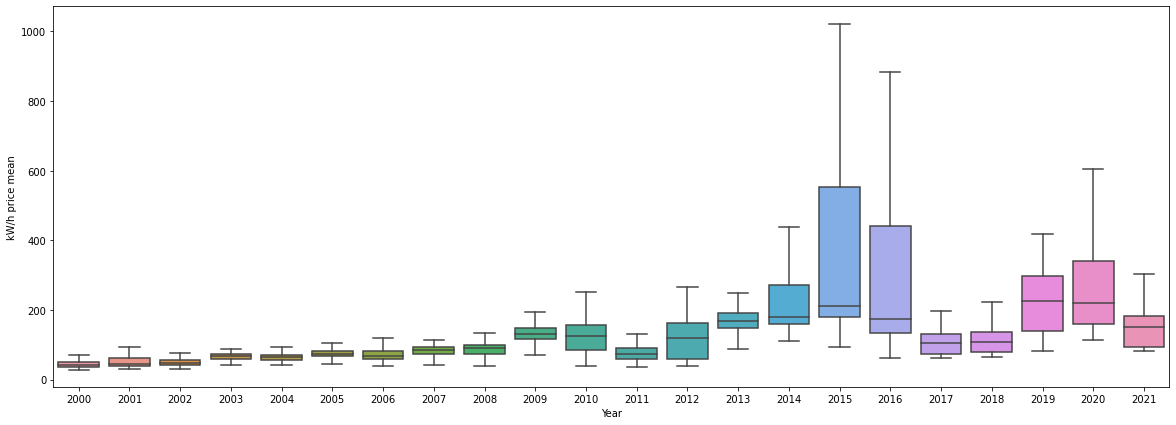

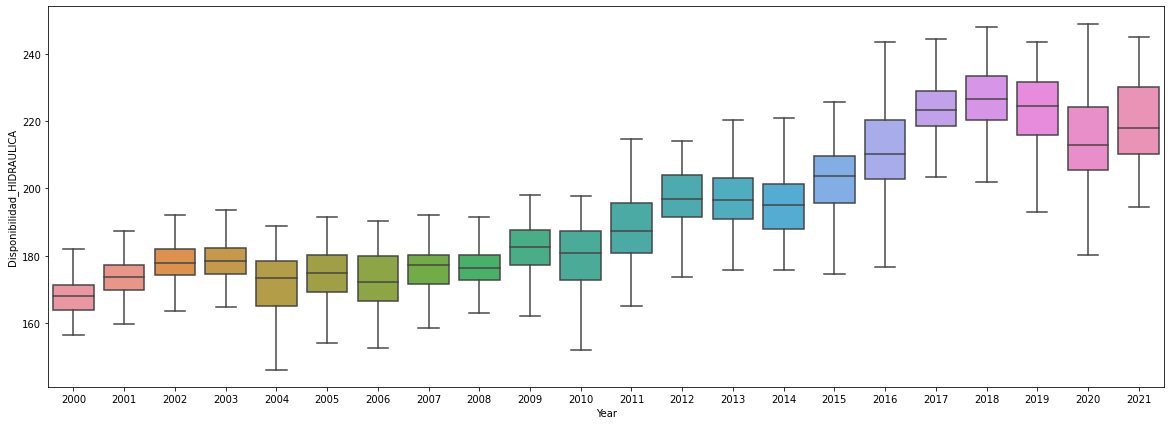

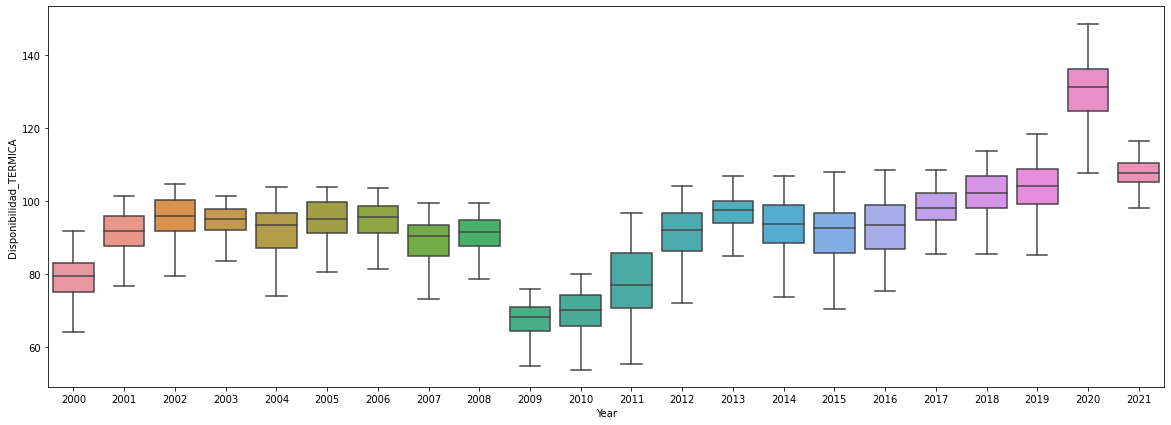

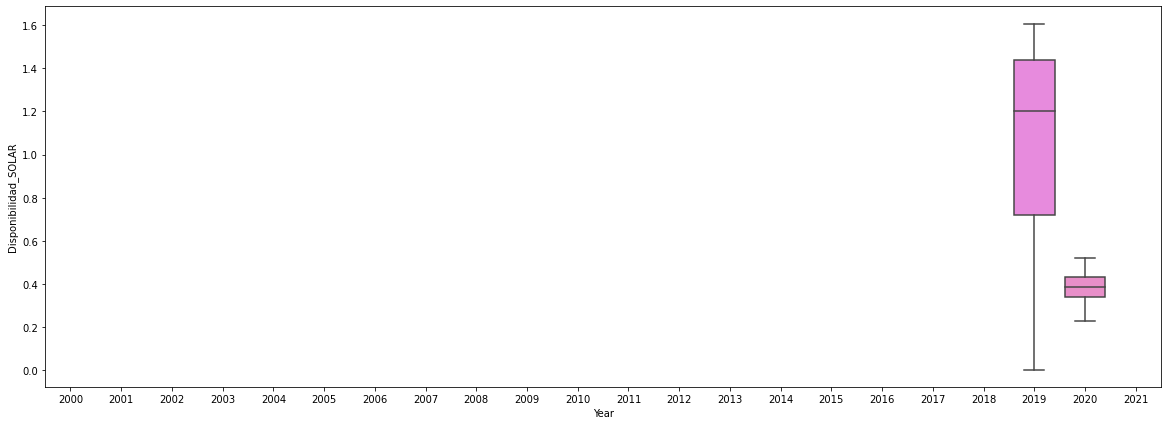

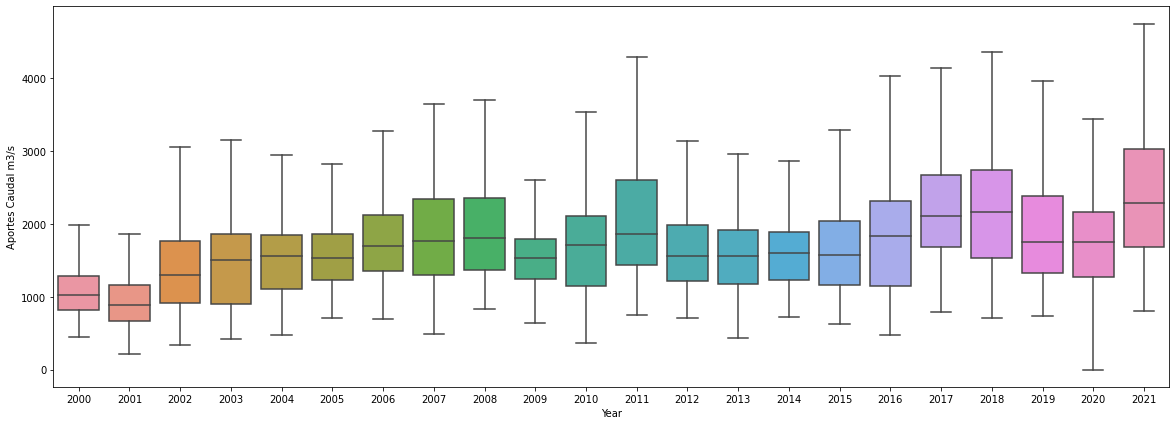

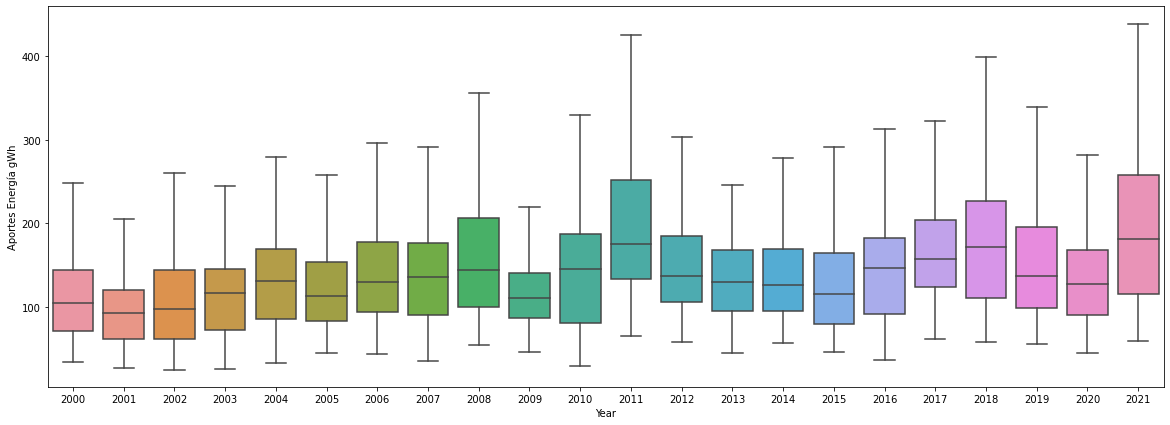

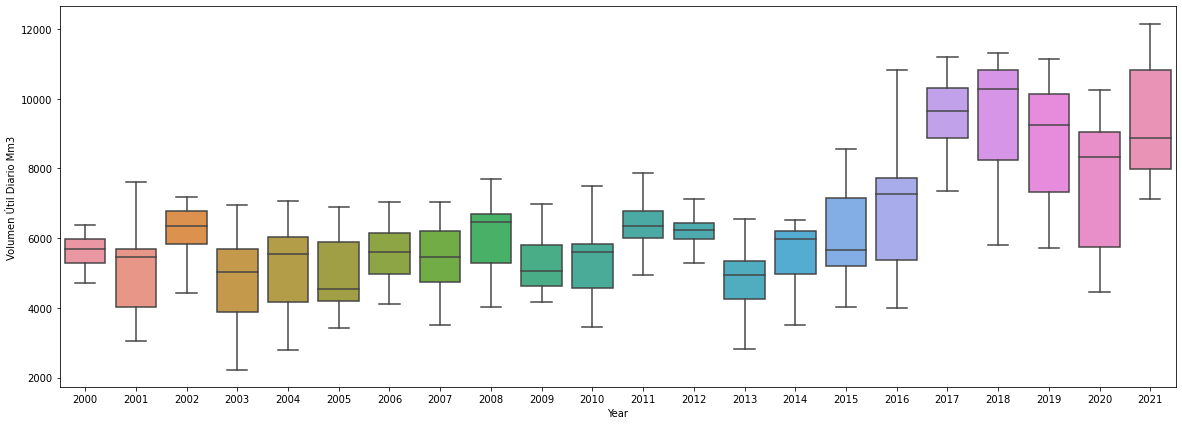

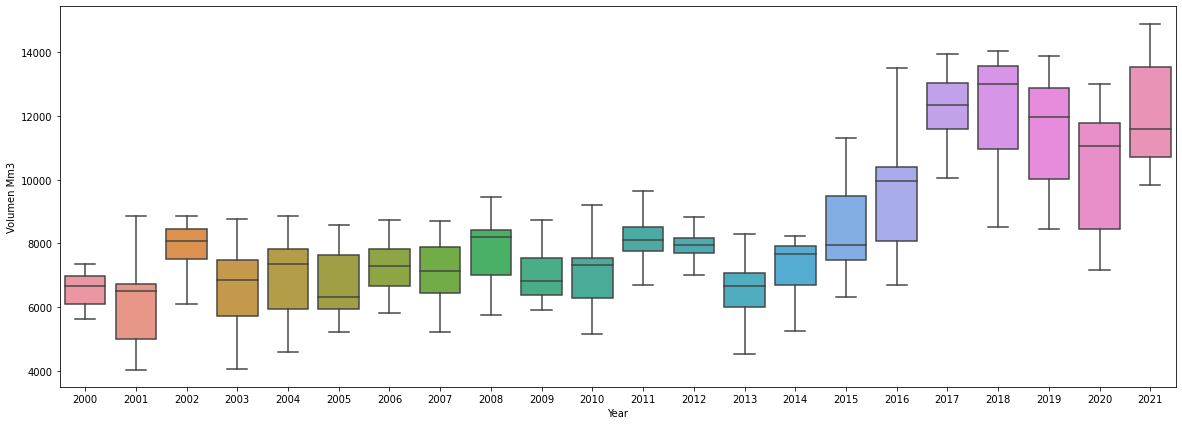

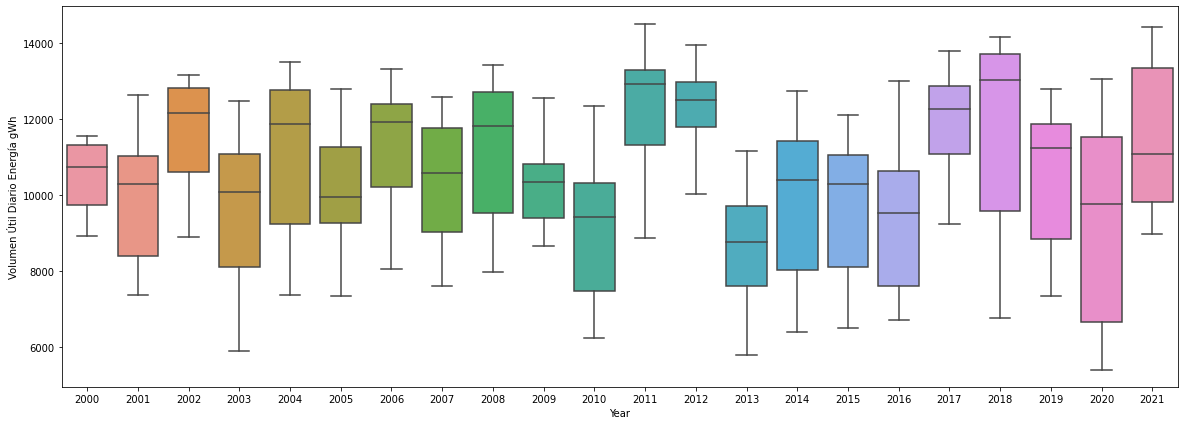

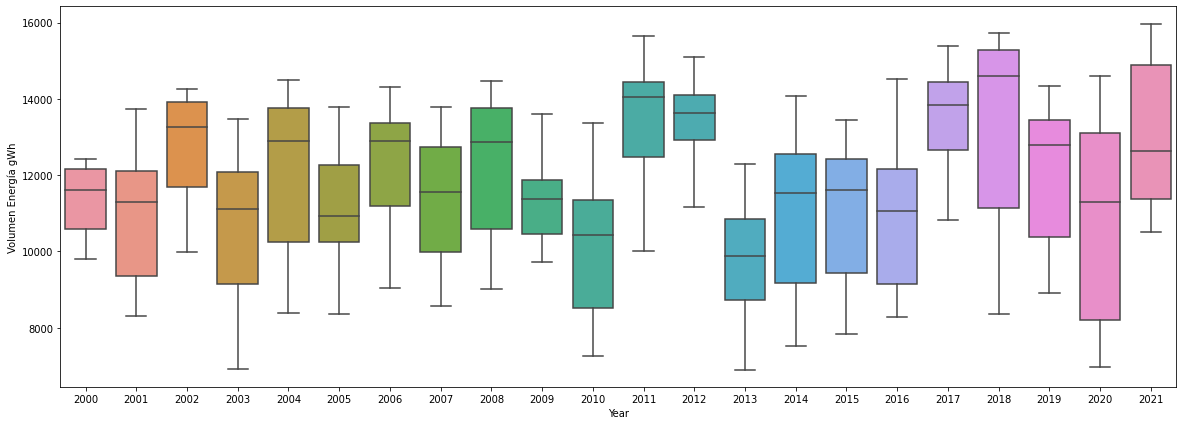

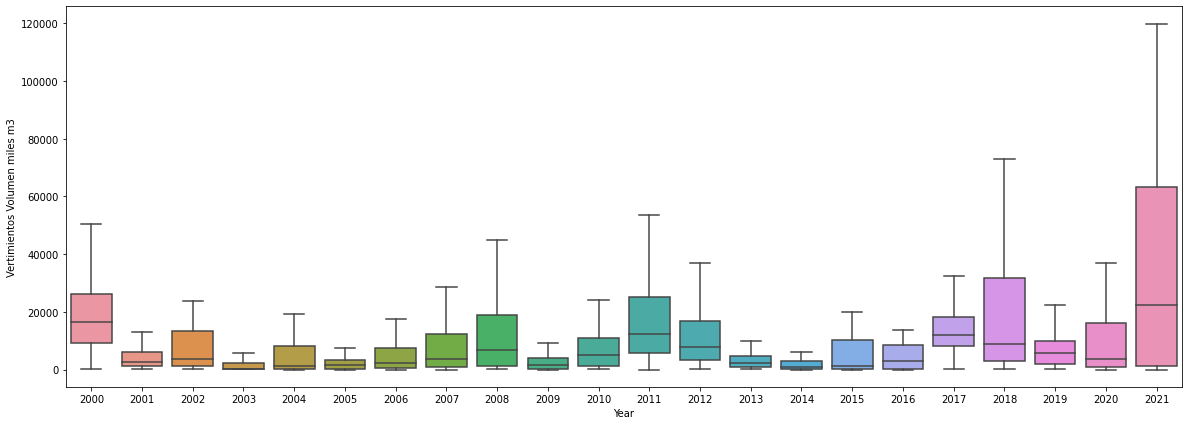

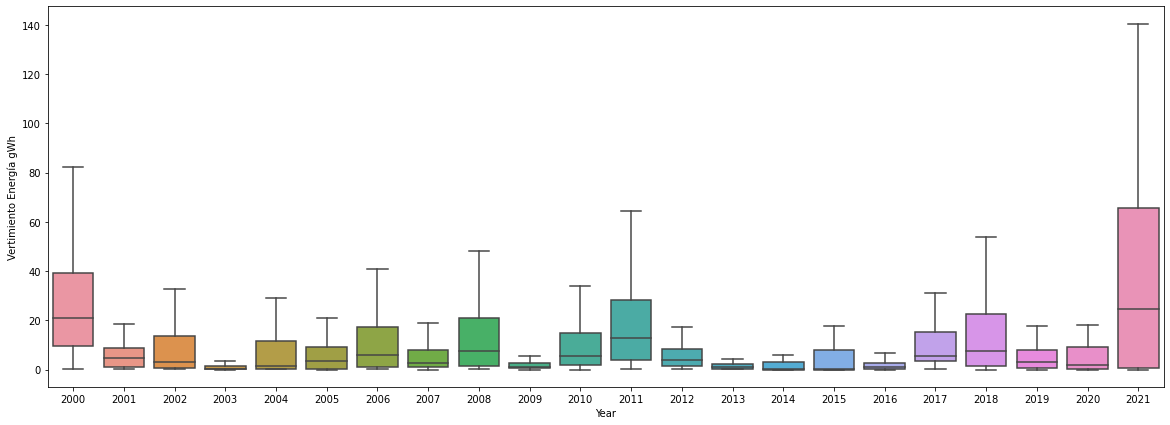

In [23]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.boxplot(data=df, x='Year', y=i, showfliers=False)
  plt.show()

Density (yearly differentiated):

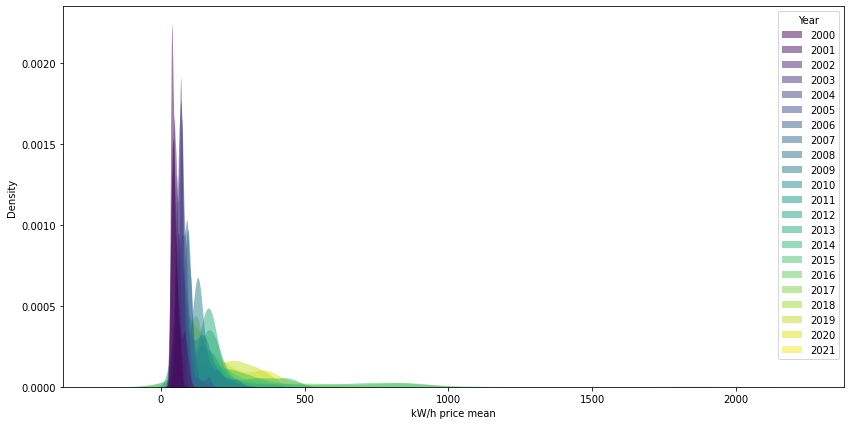

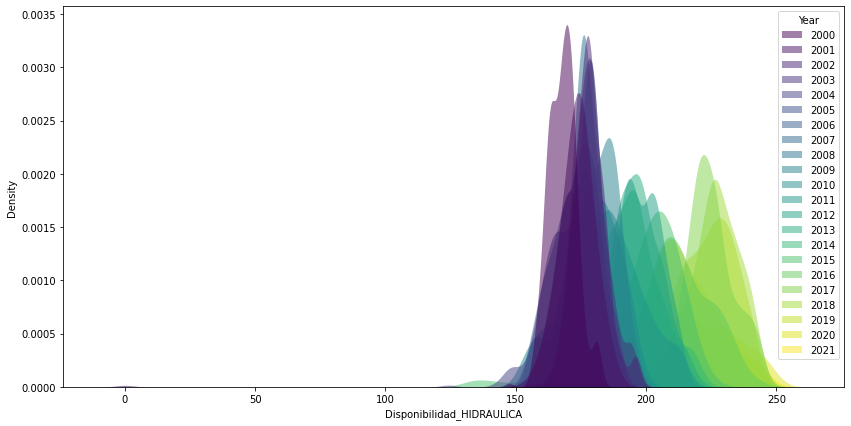

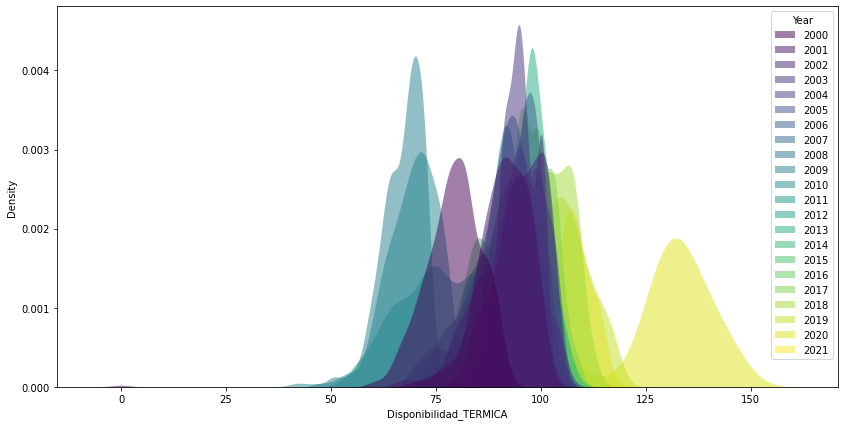

c:\users\jairoruiz\documents\github\ds4a_team88\dash\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


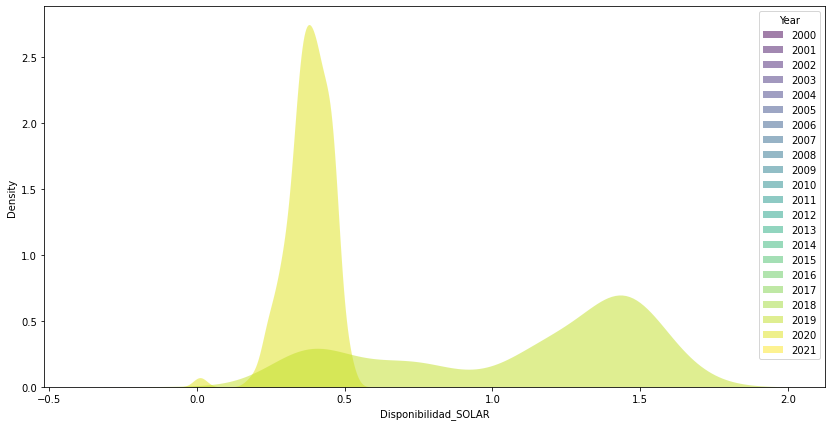

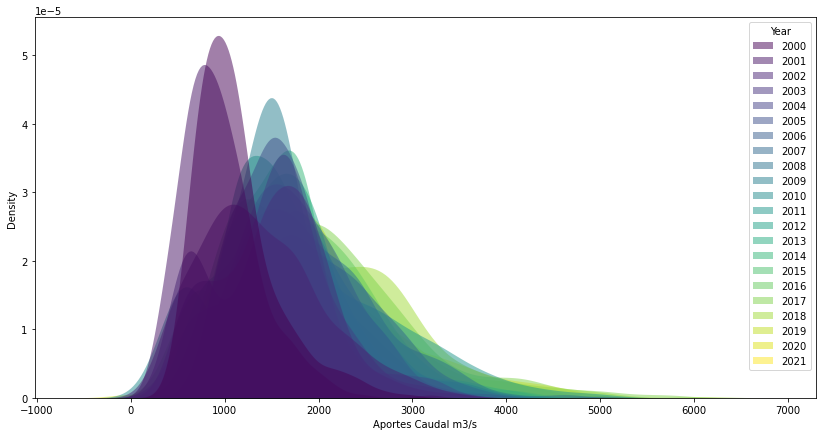

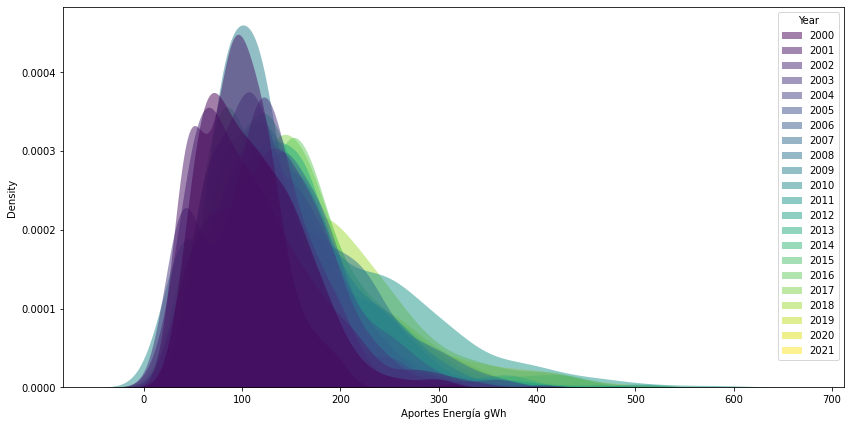

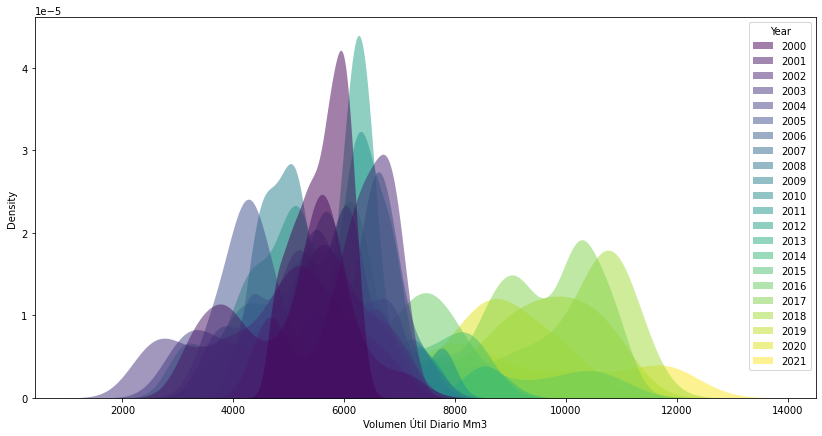

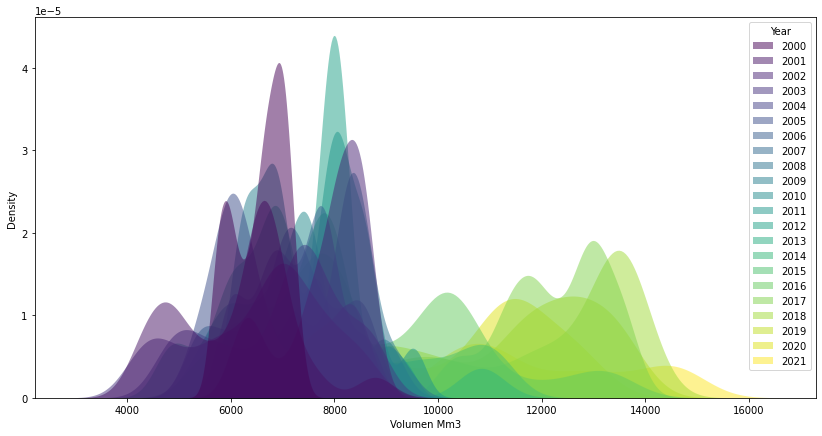

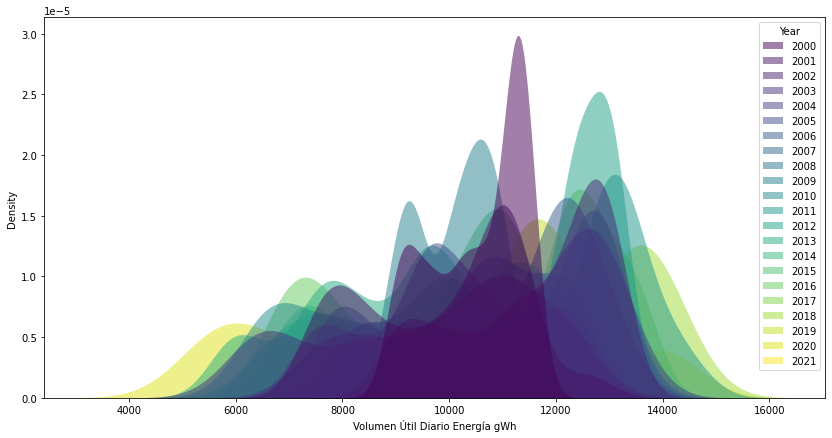

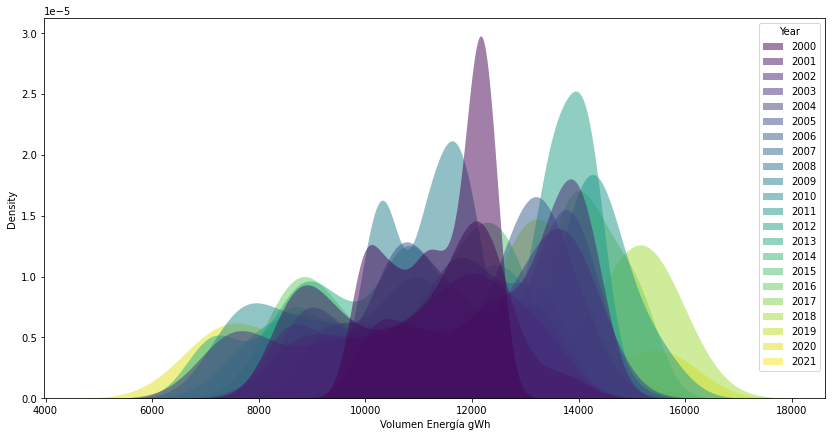

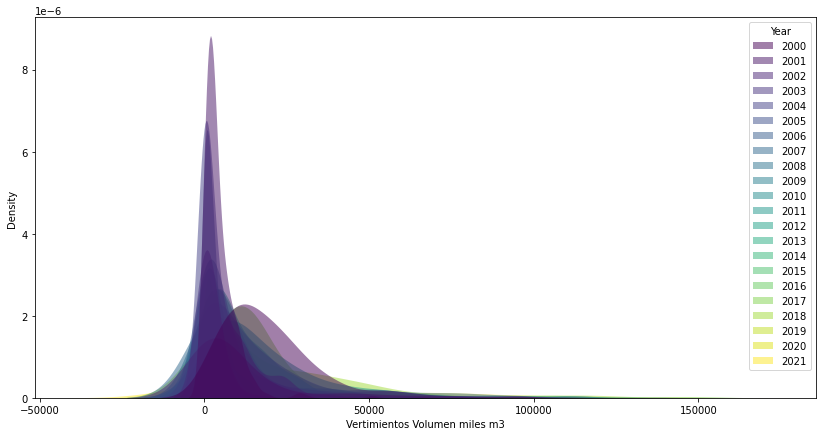

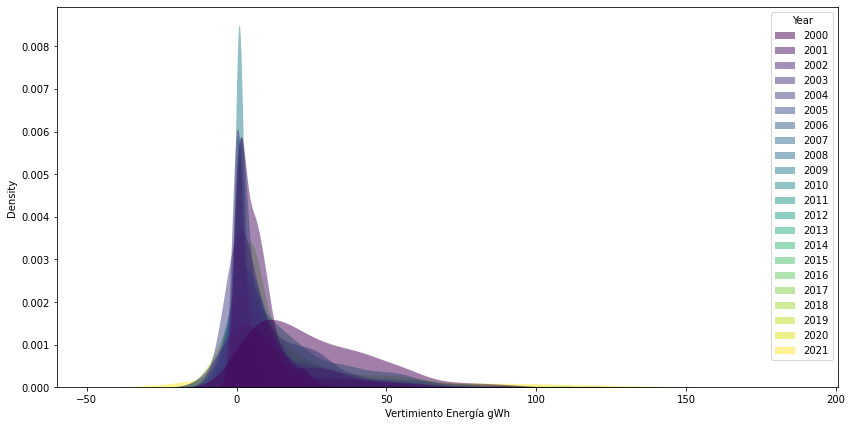

In [24]:
for i in variables:
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'Year', fill=True, alpha=.5, linewidth=0, palette = 'viridis')
  plt.show()

Density (monthly differentiated):

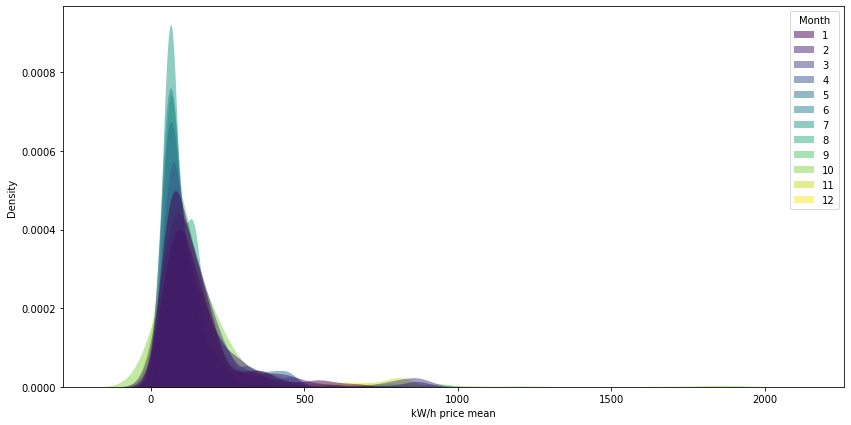

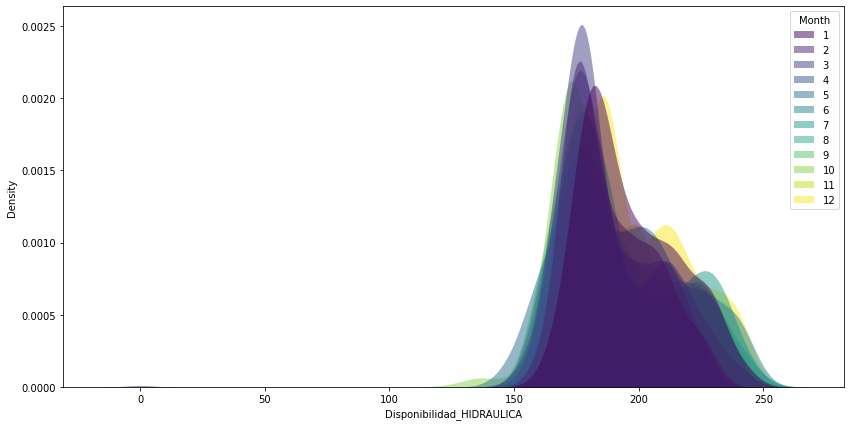

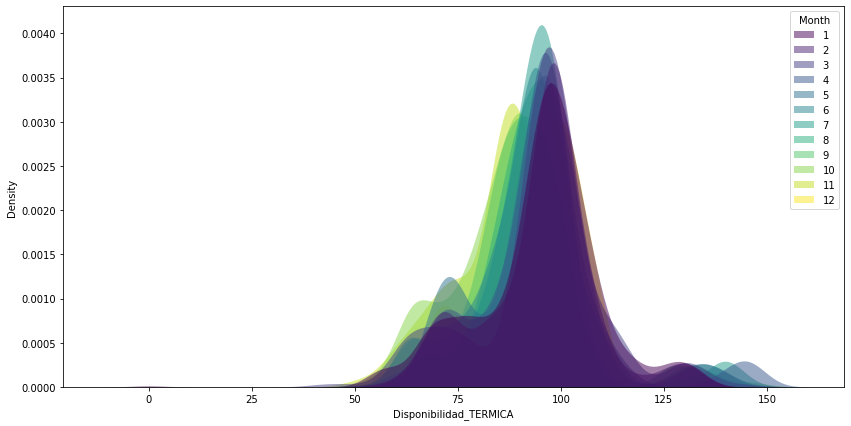

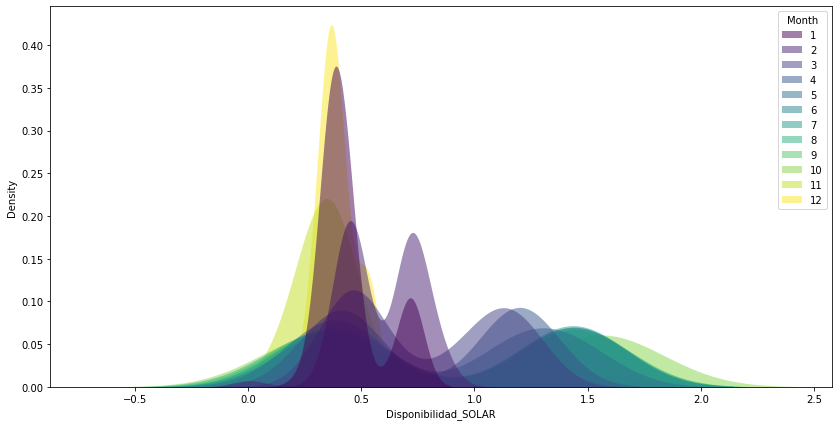

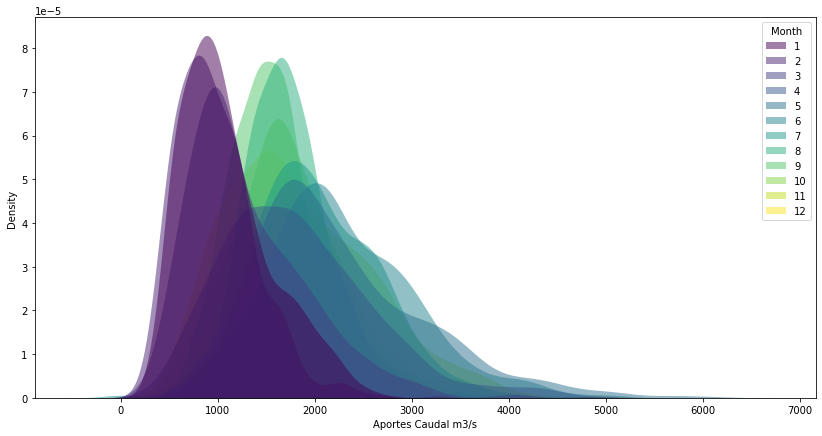

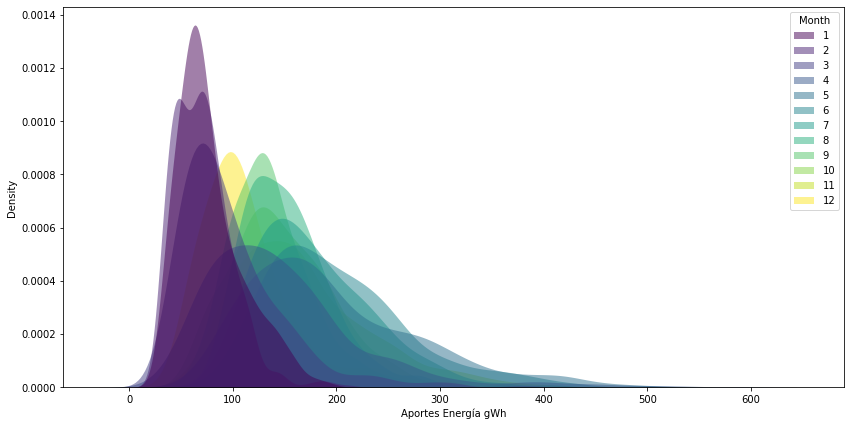

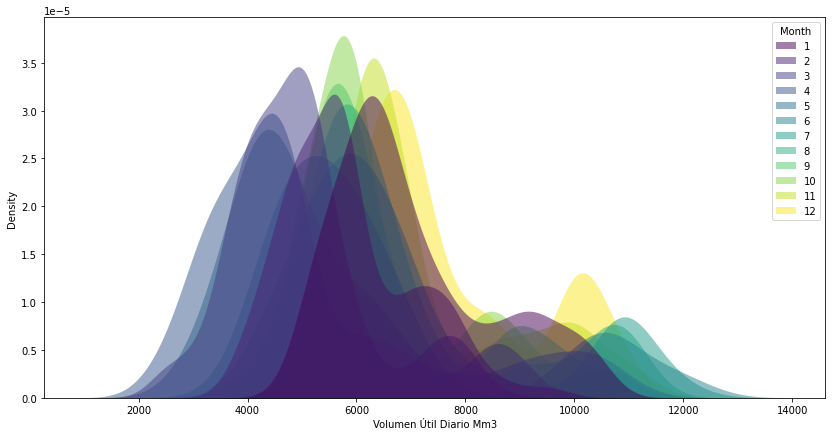

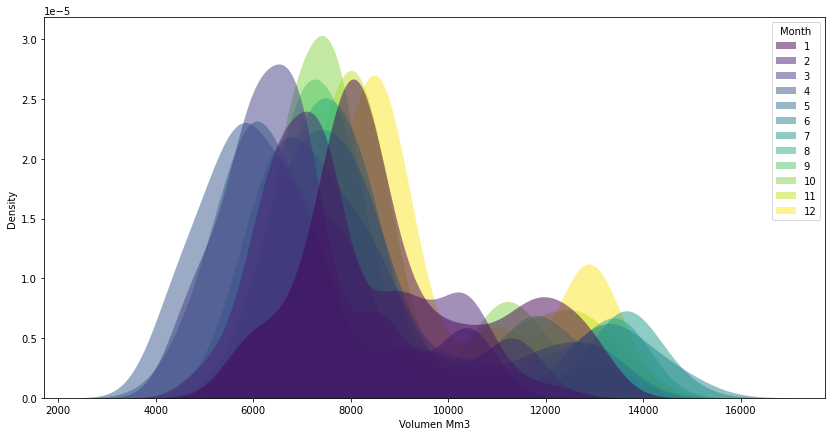

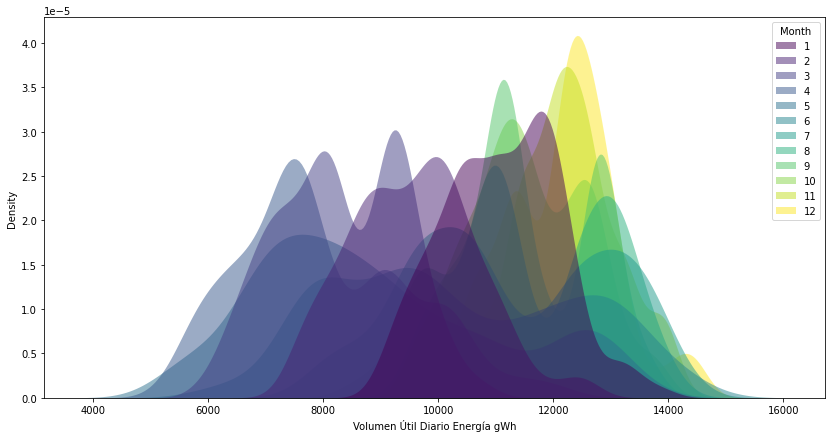

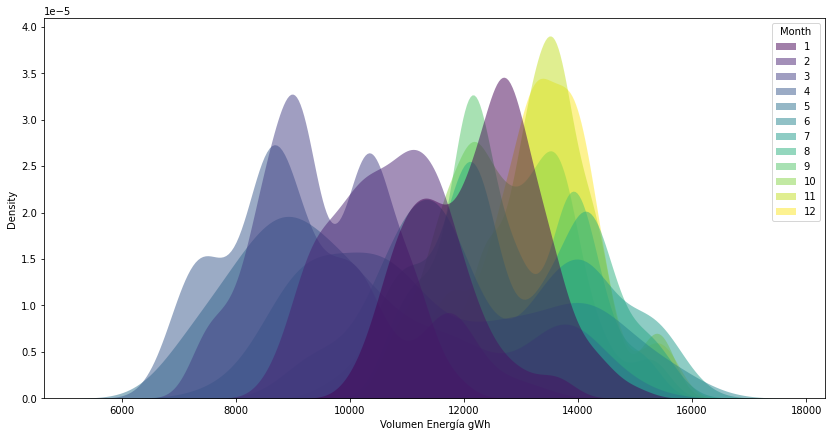

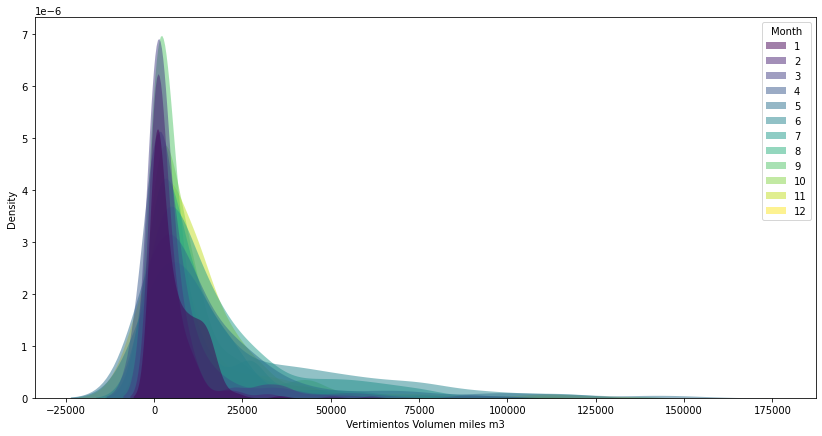

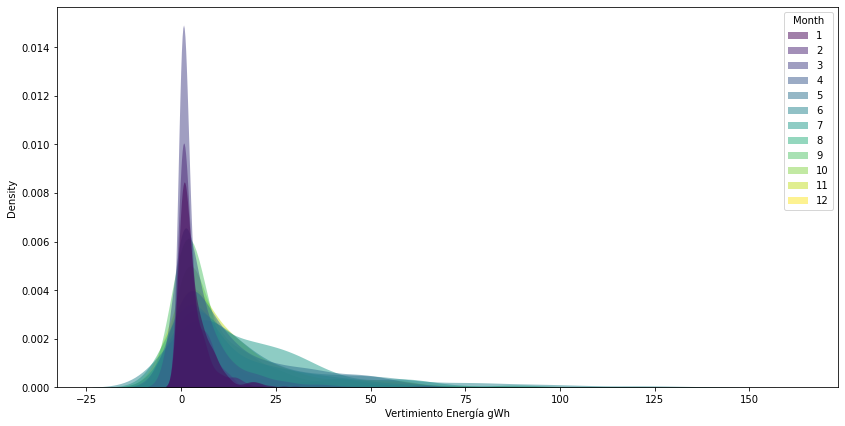

In [25]:
for i in variables:
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'Month', fill=True, alpha=.5, linewidth=0, palette = 'viridis')
  plt.show()

### Lagplots:

kW/h price mean


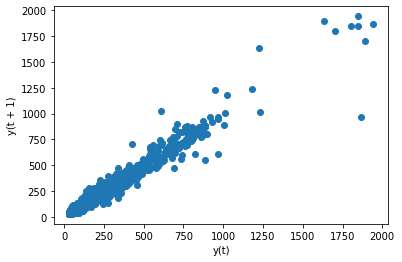

Disponibilidad_HIDRAULICA


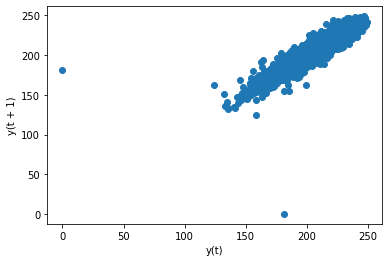

Disponibilidad_TERMICA


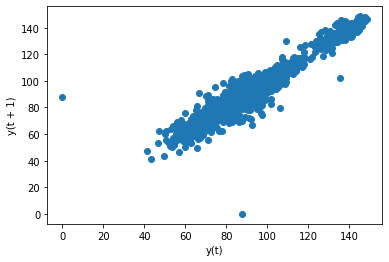

Disponibilidad_SOLAR


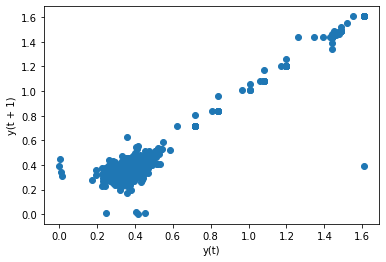

Aportes Caudal m3/s


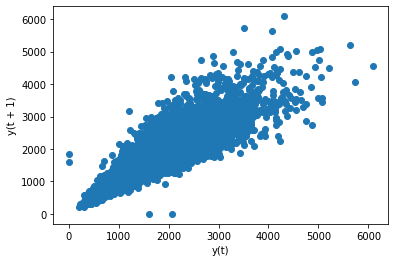

Aportes Energía gWh


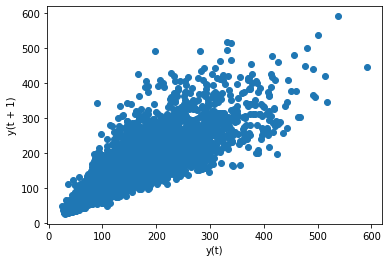

Volumen Útil Diario Mm3


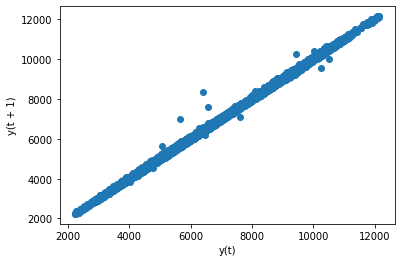

Volumen Mm3


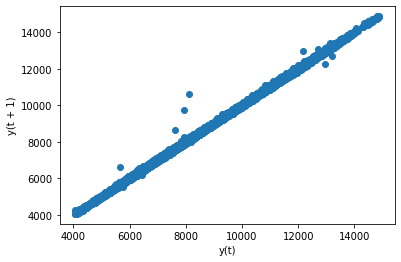

Volumen Útil Diario Energía gWh


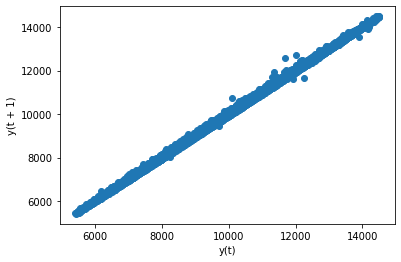

Volumen Energía gWh


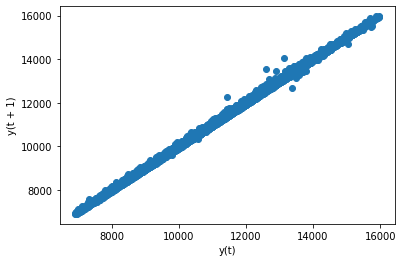

Vertimientos Volumen miles m3


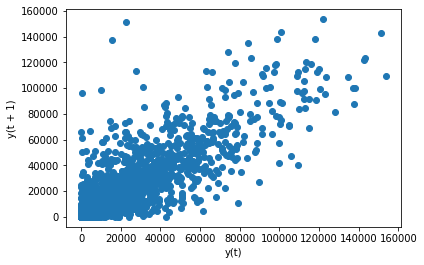

Vertimiento Energía gWh


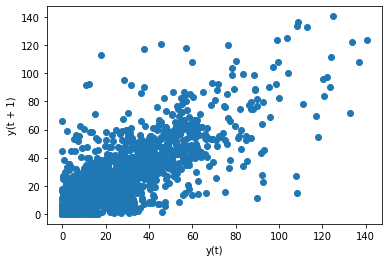

In [26]:
for i in variables:
  print(i)
  lag_plot(df[i])
  plt.show()

### Seasonal Decomposition:

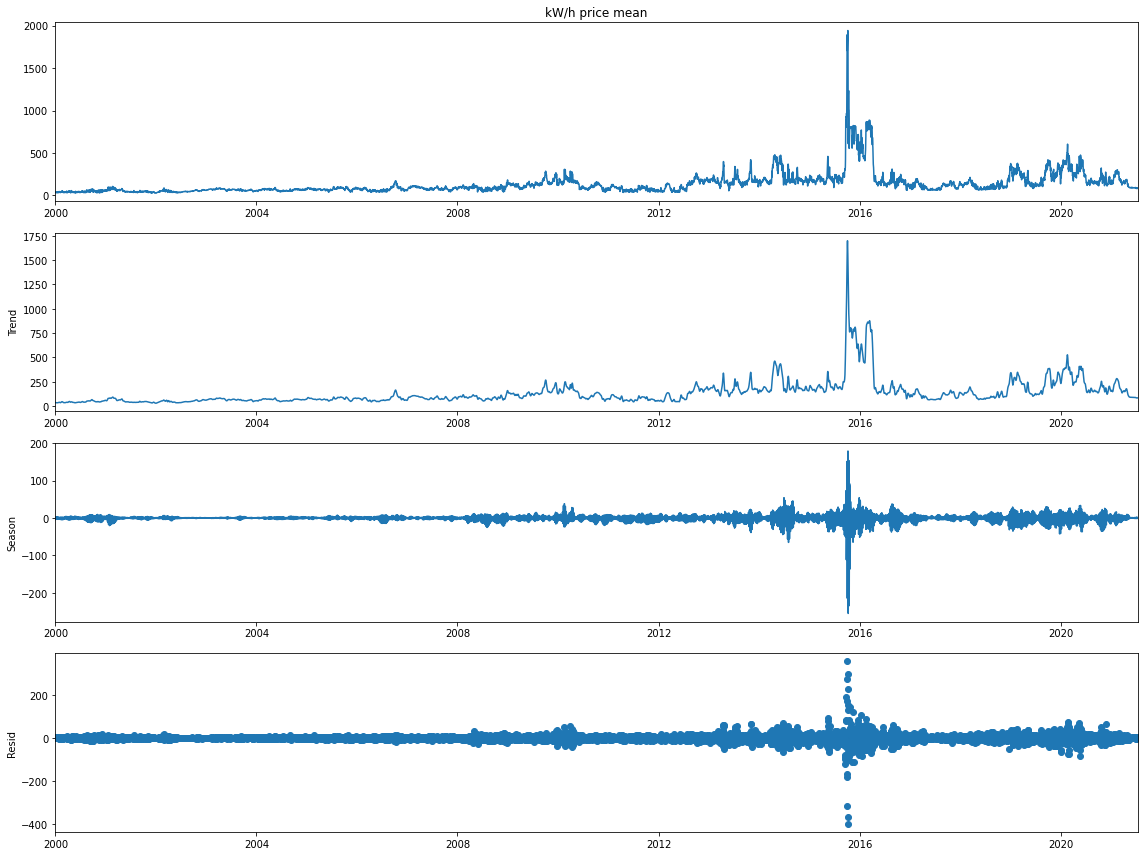

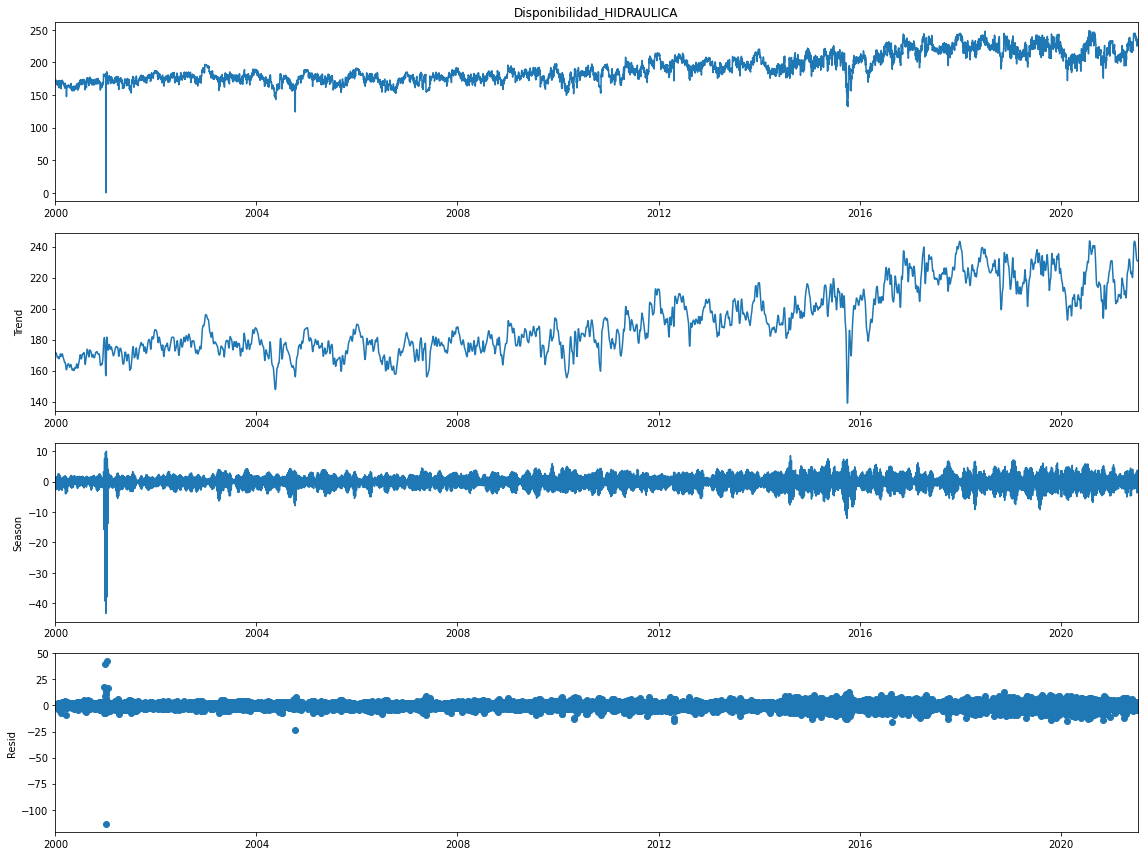

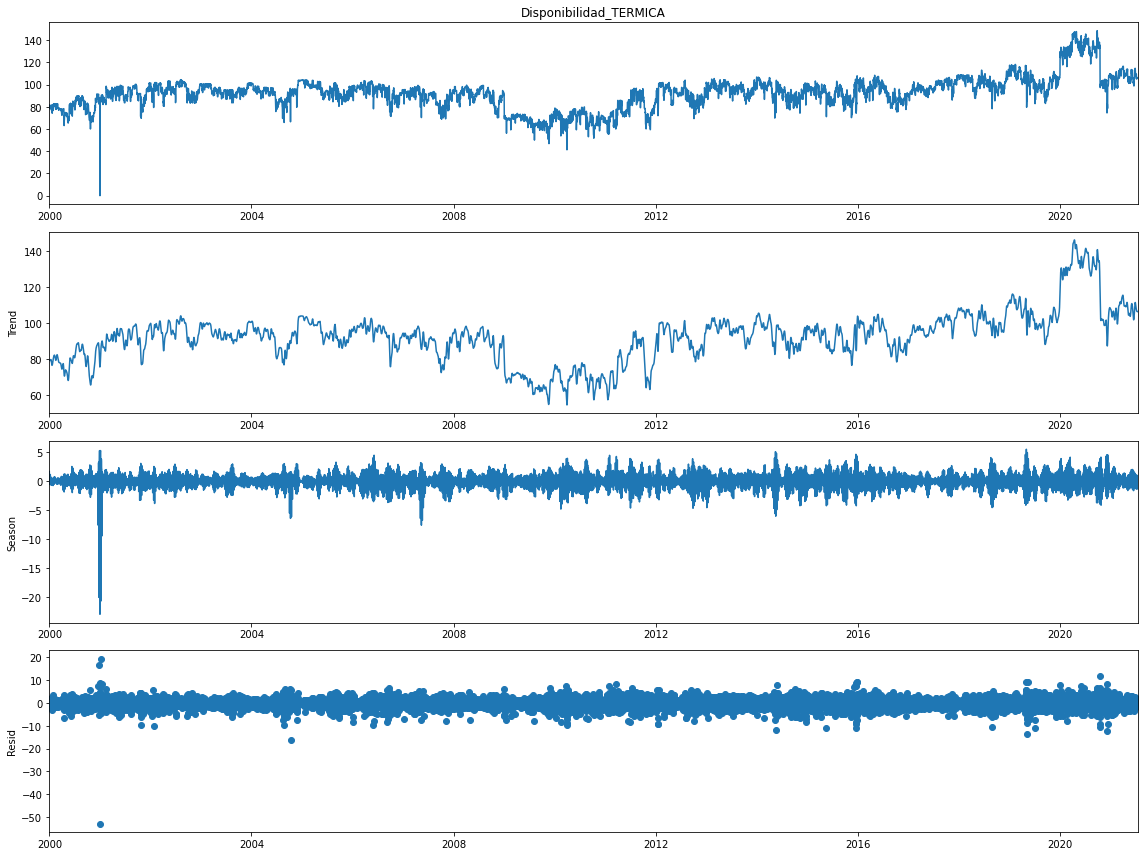

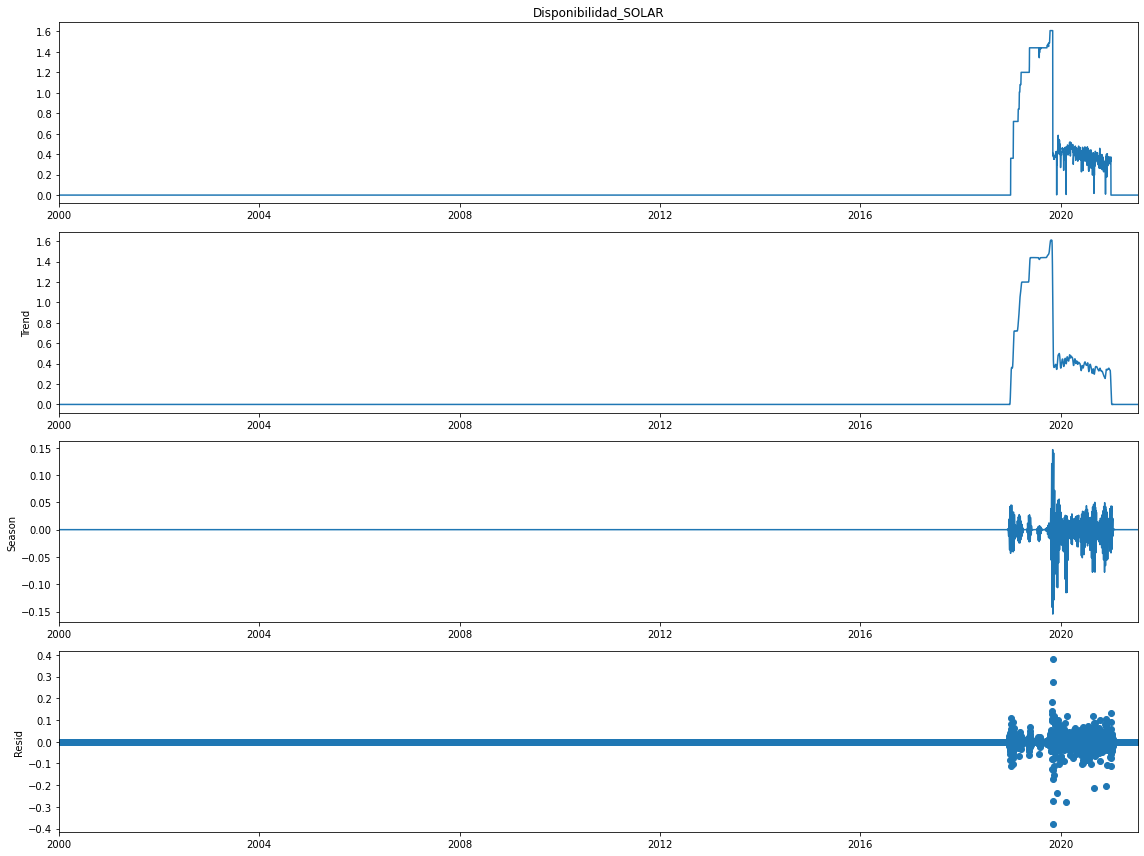

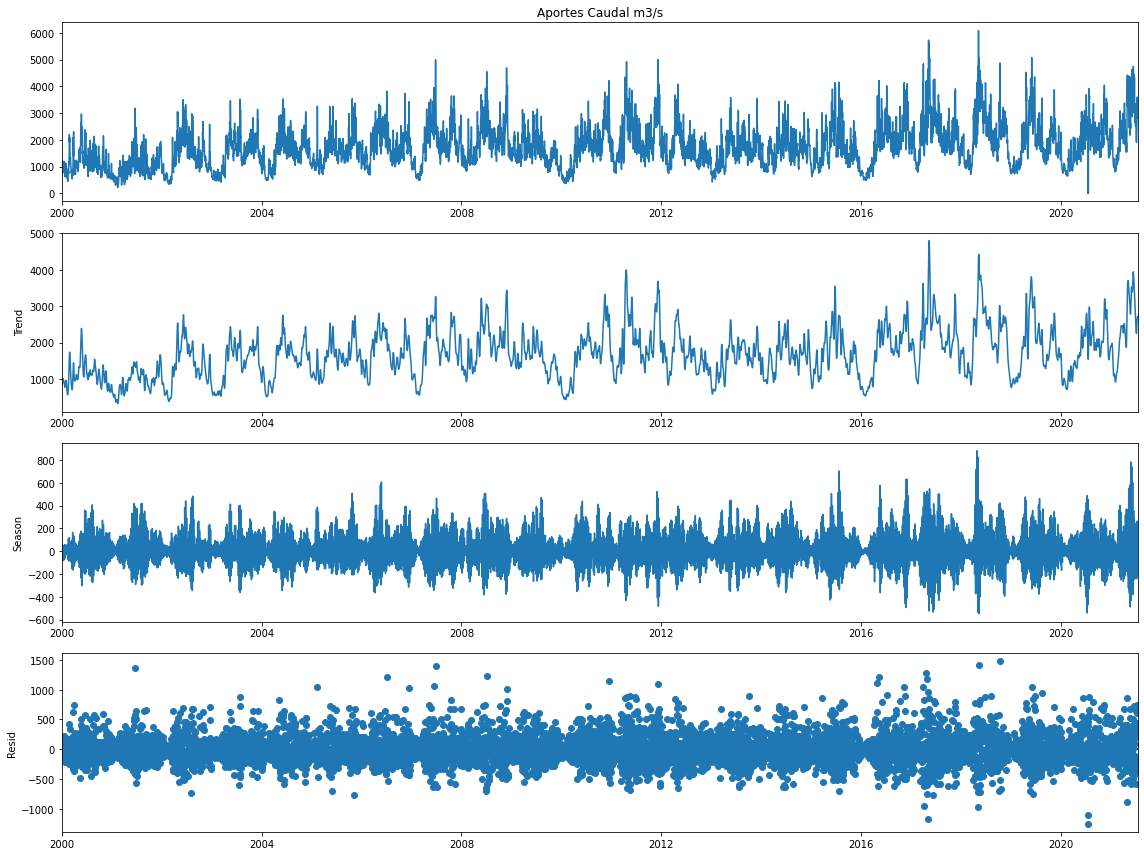

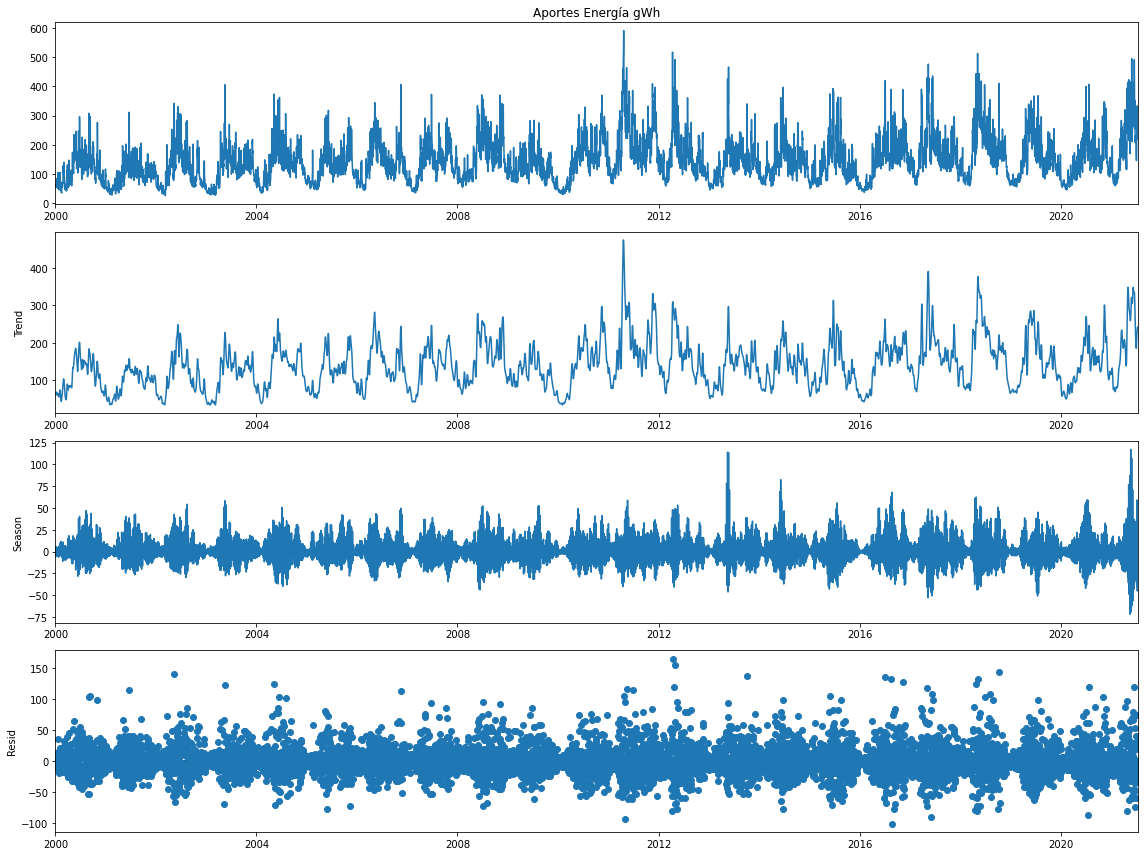

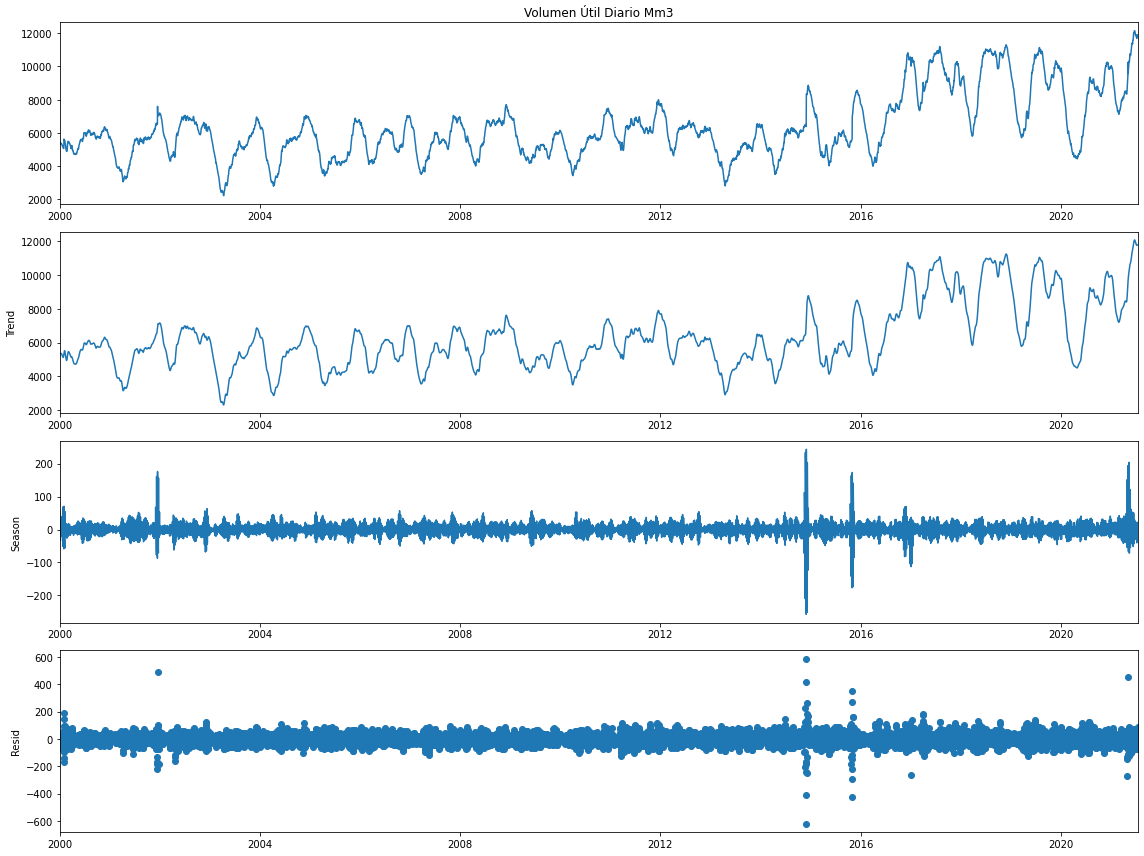

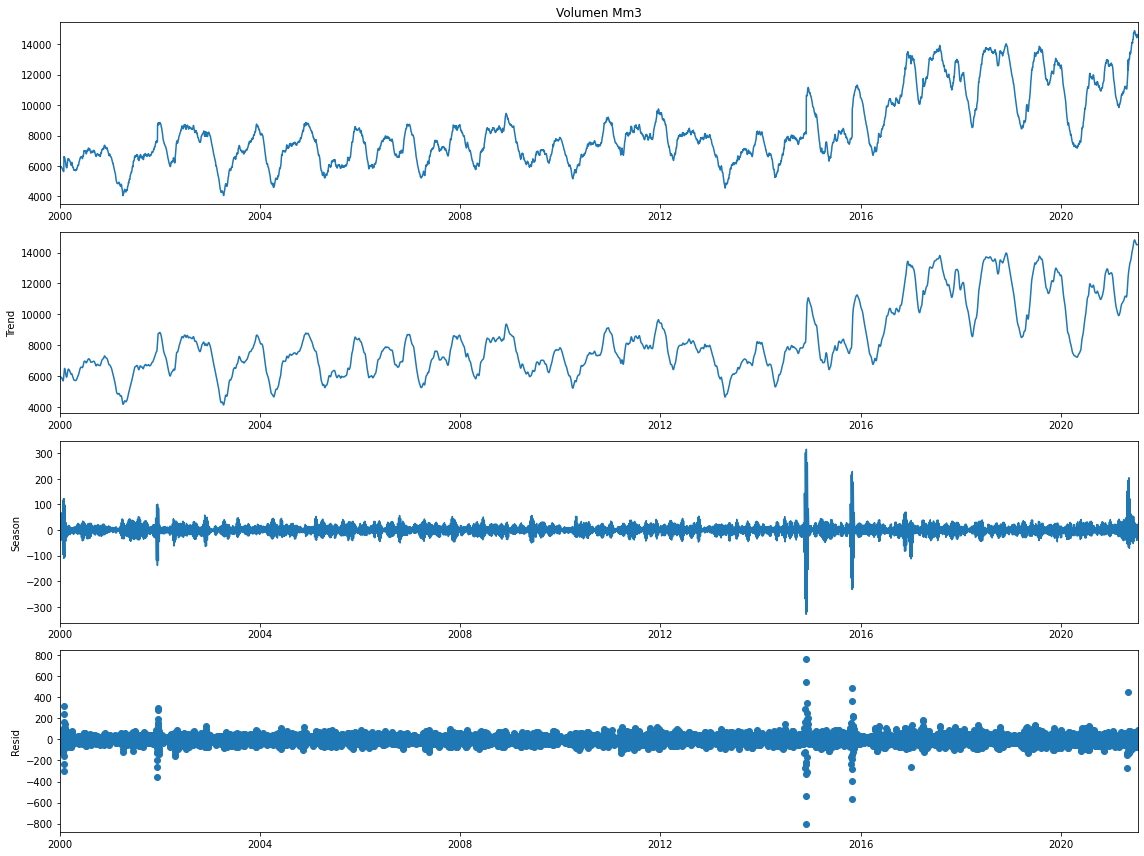

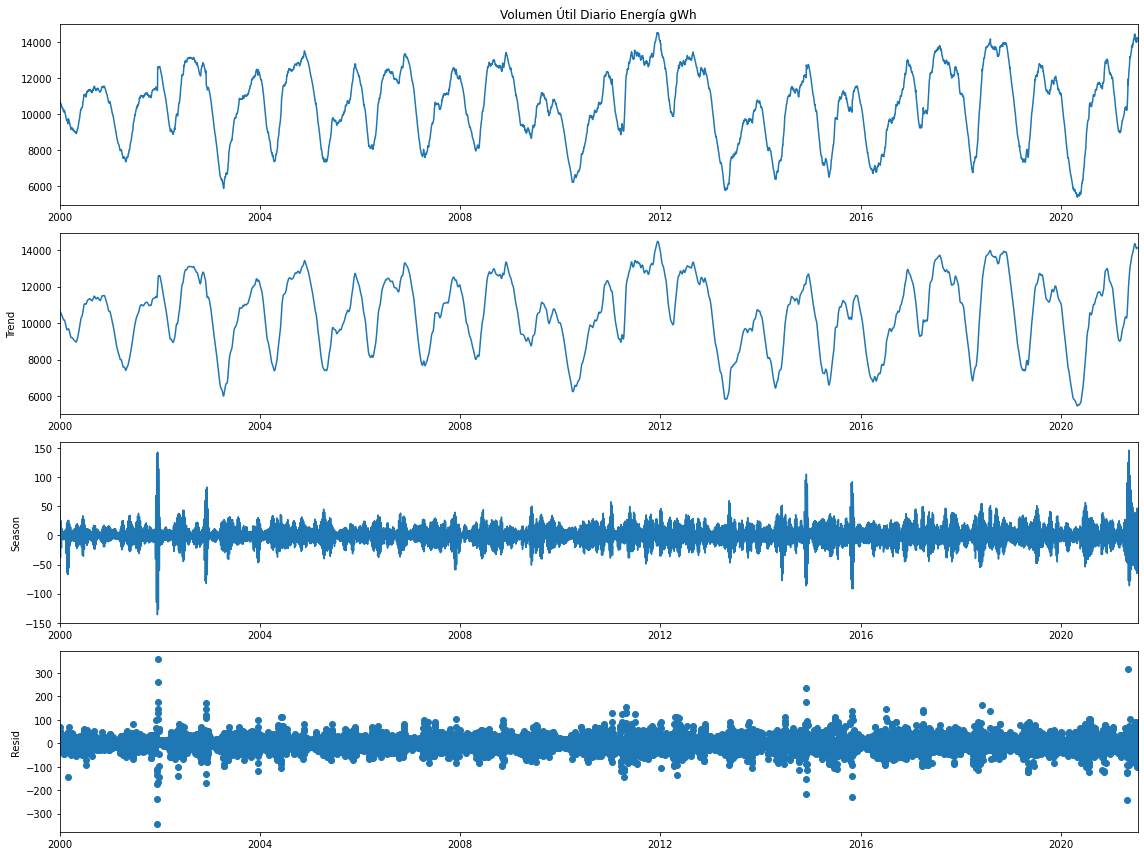

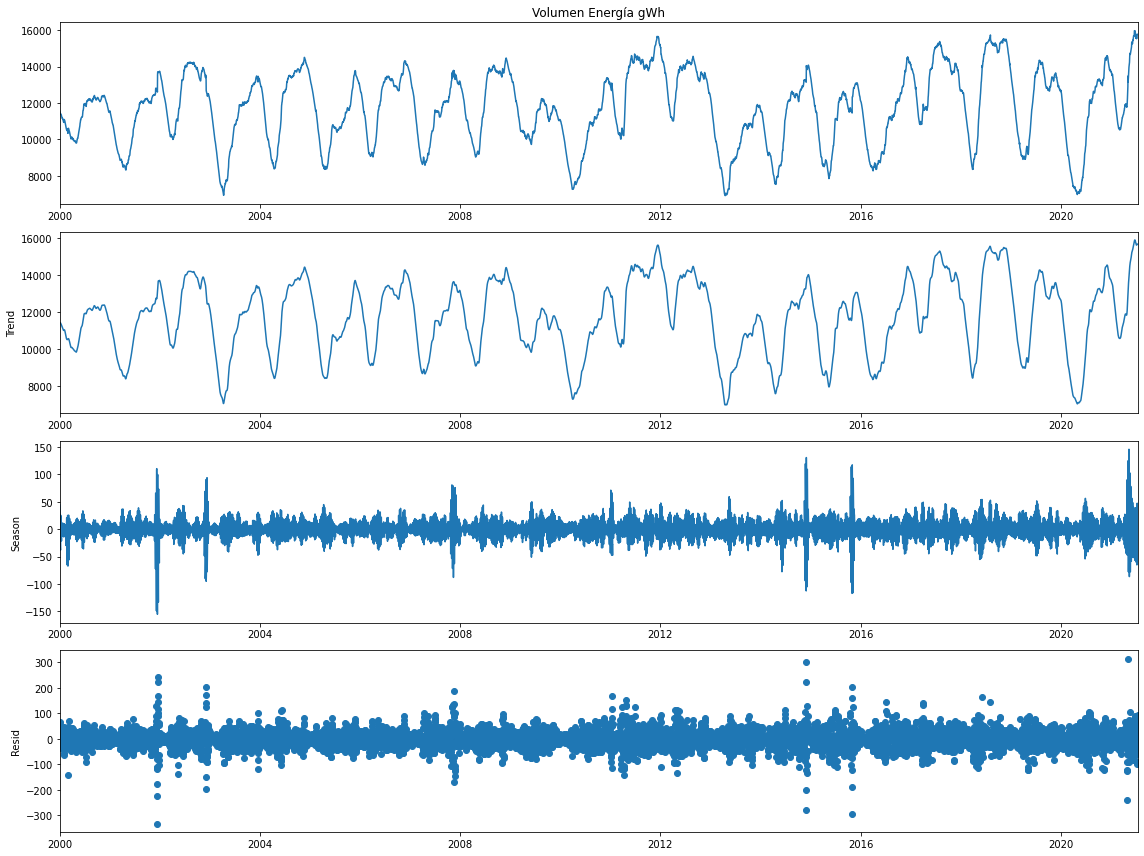

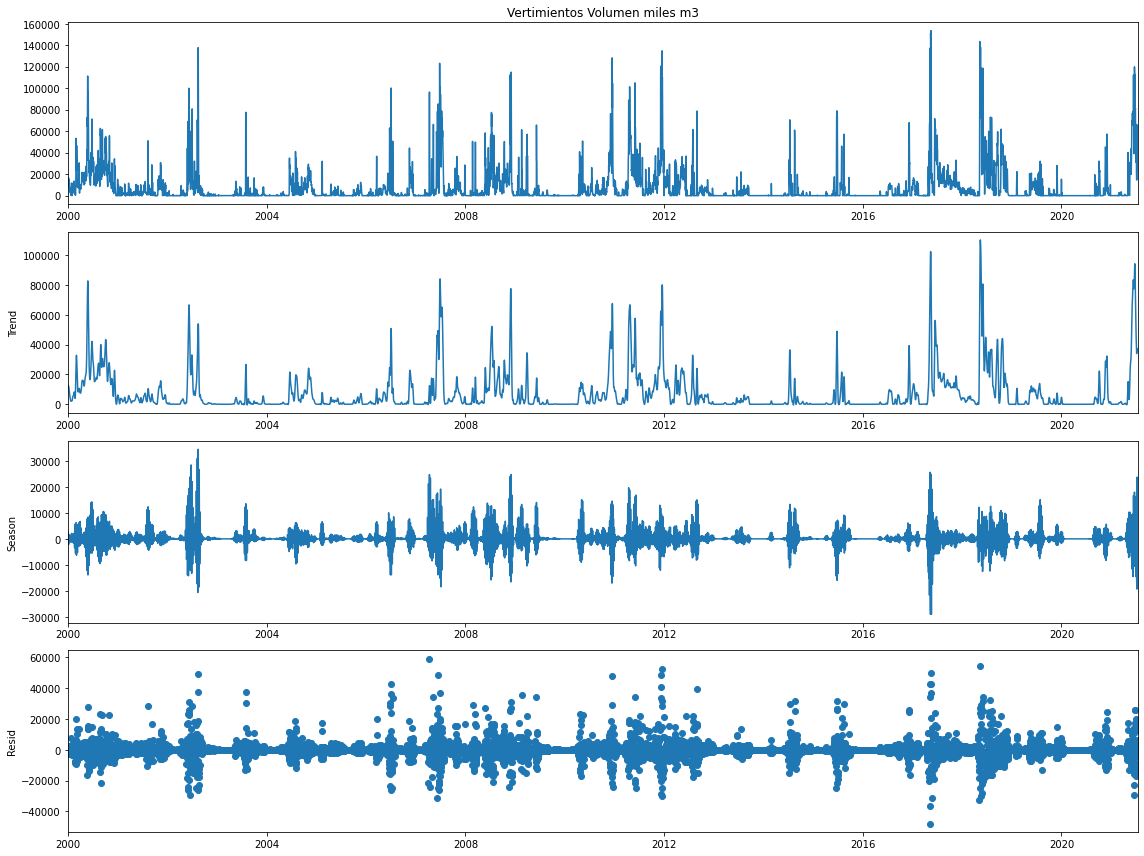

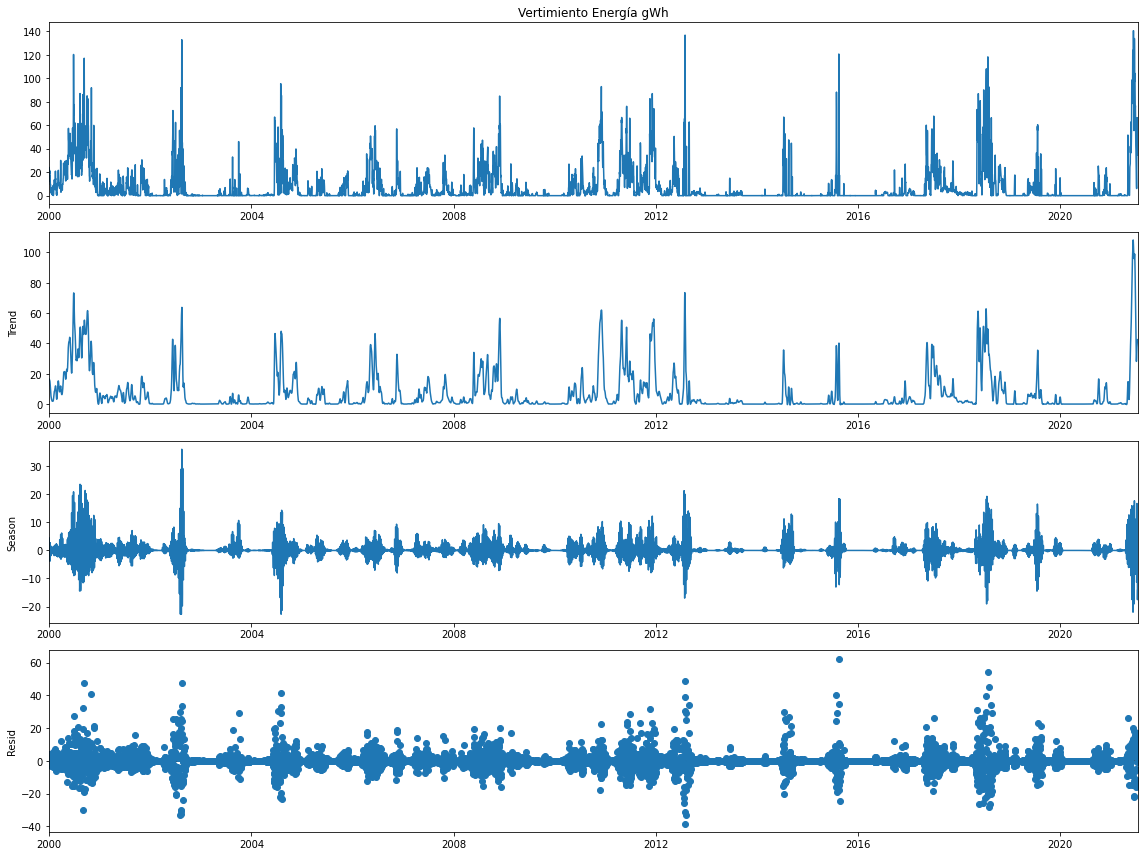

In [27]:
for i in variables:
  plt.rc('figure',figsize=(16,12))
  plt.rc('font',size=10)
  Y = df[i].fillna(0)
  stl = STL(Y)
  res = stl.fit()
  fig = res.plot()